##### <font color='green'>Sample Question 1: What is the difference in treatment completion rates between different types of substances? Which substances have the greatest differences in the probability of treatment completion and the shortest completion times? Is this consistent across states/statistical areas or are there states/statistical areas that have policies that may suggest why these trends are occurring?</font> 

##### Sample Question 2: Are treatment programs triaging admissions appropriately? For example, do pregnant women have to wait for treatment as long as a non-pregnant person? How do these wait times impact treatment efficacy, are they decreasing the probability of a successful treatment? Are individuals with a co-occurrence of mental illness and substance abuse more likely to commit crimes before admission or discharge from the treatment program? What data driven policy recommendations can you make for triaging admissions and maximizing treatment outcomes? Are these recommendations consistent across the US or are there specific calibrations to the recommendations needed for certain regions, states or statistical areas?

##### Sample Question 3: What is the impact of self help groups on improving the treatment outcomesof substance abuse? Are there any benefits of being in one before admission or discharge? Which demographics or substance abuse cohorts benefit the most from them? Compare areas that are known to have these more (while adjusting for population)? How do community demographics interact with the efficacy of self help groups?

##### Sample Question 4: Can you discover any natural experiments between states, counties or statistical areas? If you do, how can they help inform/evaluate substance abuse treatment programs? Can you showcase that their unique demographics are being overlooked or is this demographic less unique than expected and can you suggest how it should inform policy surrounding substance abuse treatment programs? What tactics or strategies for running treatment programs can be uncovered or inspired by this discovery?

##### Sample Question 5: Identify what states,regions, or statistical areas are neglecting types of substance abuse programs or consistently having failed treatments. Can you demonstrate a data driven understanding of why this is occurring and offer potential and practical solutions to aid in solving their issues.


### <font color='green'> Proceeding with 1st question</font>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read dataset
pd.set_option('display.max_columns',None)
df_treatment=pd.read_csv('./Datasets/treatments_2017-2020.csv')
df_treatment.head(3) 

REASON  FRSTUSE2  EMPLOY_D  MARSTAT  PRIMINC  TRNQFLG  NOPRIOR  PREG  \
0       6        -9         1       -9       -9        0        0     2   
1       4         6         4       -9       -9        0        1     1   
2       3         5         3        1        2        0        1     1   

   METHUSE  FRSTUSE3  DETNLF_D  FREQ2  SUB2  INHFLG  SUB1_D  ALCDRUG  \
0        1        -9        -9     -9     1       0       7        2   
1        1        -9        -9      3    10       0       5        2   
2        1        -9        -9      2    10       0       5        2   

   SERVICES  AGE  ETHNIC  SERVICES_D  DETNLF  PRIMPAY  HERFLG  IDU  REGION  \
0         7    7       4           7      -9       -9       0   -9       4   
1         7    7       4           7      -9       -9       1    1       4   
2         7    5       4           7      -9        4       1    1       4   

   LOS  FREQ_ATND_SELF_HELP_D  SEDHPFLG  SUB3  BENZFLG  OPSYNFLG  FREQ3_D  \
0   37                     -9         0    -9        0         1       -9   
1   15                     -9         0    -9        0         0       -9   
2   36                      1         0     1        0         0       -9   

   ALCFLG  SUB2_D  OTCFLG  HLTHINS  DIVISION  GENDER  STFIPS  ROUTE3  \
0       0       1       0       -9         9       2       6      -9   
1       0      10       0       -9         9       2       6      -9   
2       0      10       0        2         9       2       2      -9   

   FRSTUSE1  AMPHFLG  PCPFLG  PSOURCE  COKEFLG  MTHAMFLG  SUB3_D  DAYWAIT  \
0         6        0       0        1        0         0       1        0   
1         7        0       0        3        0         1       1        0   
2         5        0       0        1        0         1       1        0   

    CBSA  PSYPROB  RACE  ROUTE1  DETCRIM  VET  ARRESTS_D  MARFLG  FREQ1_D  \
0  42020        2     5       1       -9    2          0       0        1   
1  17020        2     5       4       -9    2          0       0        1   
2  11260        1     5       4       -9    2          0       0        1   

   STIMFLG  LIVARAG_D  FREQ1  SUB1  DISYR  BARBFLG  EMPLOY  LIVARAG  FREQ2_D  \
0        0          2      3     7   2017        0       2        3       -9   
1        0          2      3     5   2017        0       4        3       -9   
2        0          3      3     5   2017        0       3        3       -9   

   HALLFLG  ROUTE2  ARRESTS  FREQ_ATND_SELF_HELP  EDUC  DSMCRIT  METHFLG  \
0        0      -9        0                   -9     3       -9        0   
1        0       4        0                   -9     3       -9        0   
2        0       4        0                    1    -9       -9        0   

   FREQ3       CASEID  OTHERFLG  \
0     -9  20171463590         0   
1     -9  20171390962         0   
2     -9  20171519498         0   

                                       cbsatitle  \
0  San Luis Obispo-Paso Robles-Arroyo Grande, CA   
1                                      Chico, CA   
2                                  Anchorage, AK   

  metropolitanmicropolitanstatis  \
0  Metropolitan Statistical Area   
1  Metropolitan Statistical Area   
2  Metropolitan Statistical Area   

                              countycountyequivalent   statename  \
0                             San Luis Obispo County  California   
1                                       Butte County  California   
2  Matanuska-Susitna Borough, Anchorage Municipality      Alaska   

  fipscountycode centraloutlyingcounty  
0             79               Central  
1              7               Central  
2        170, 20     Central, Outlying

In [3]:
df_treatment.describe()

REASON      FRSTUSE2      EMPLOY_D       MARSTAT       PRIMINC  \
count  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06   
mean   2.385314e+00 -1.795223e+00  9.664170e-01 -4.079564e-01 -1.169764e+00   
std    1.557680e+00  6.494818e+00  4.428023e+00  4.372447e+00  6.098589e+00   
min    1.000000e+00 -9.000000e+00 -9.000000e+00 -9.000000e+00 -9.000000e+00   
25%    1.000000e+00 -9.000000e+00  1.000000e+00  1.000000e+00 -9.000000e+00   
50%    2.000000e+00  2.000000e+00  3.000000e+00  1.000000e+00  1.000000e+00   
75%    4.000000e+00  4.000000e+00  4.000000e+00  2.000000e+00  5.000000e+00   
max    7.000000e+00  7.000000e+00  4.000000e+00  4.000000e+00  5.000000e+00   

            TRNQFLG       NOPRIOR          PREG       METHUSE      FRSTUSE3  \
count  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06   
mean   3.272303e-04 -2.055587e-01 -5.552021e+00  9.212197e-01 -6.144871e+00   
std    1.808655e-02  2.767901e+00  5.091777e+00  3.048190e+00  5.351355e+00   
min    0.000000e+00 -9.000000e+00 -9.000000e+00 -9.000000e+00 -9.000000e+00   
25%    0.000000e+00  0.000000e+00 -9.000000e+00  2.000000e+00 -9.000000e+00   
50%    0.000000e+00  1.000000e+00 -9.000000e+00  2.000000e+00 -9.000000e+00   
75%    0.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00 -9.000000e+00   
max    1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  7.000000e+00   

           DETNLF_D         FREQ2          SUB2        INHFLG        SUB1_D  \
count  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06   
mean  -6.003228e+00 -2.720211e+00  3.448952e+00  1.168397e-03  3.436826e+00   
std    5.524554e+00  5.490513e+00  4.091445e+00  3.416186e-02  4.706857e+00   
min   -9.000000e+00 -9.000000e+00 -9.000000e+00  0.000000e+00 -9.000000e+00   
25%   -9.000000e+00 -9.000000e+00  1.000000e+00  0.000000e+00  2.000000e+00   
50%   -9.000000e+00  1.000000e+00  2.000000e+00  0.000000e+00  4.000000e+00   
75%   -9.000000e+00  2.000000e+00  4.000000e+00  0.000000e+00  5.000000e+00   
max    5.000000e+00  3.000000e+00  1.900000e+01  1.000000e+00  1.900000e+01   

            ALCDRUG      SERVICES           AGE        ETHNIC    SERVICES_D  \
count  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06   
mean   2.067921e+00  5.304141e+00  6.985099e+00  3.556934e+00  5.319058e+00   
std    7.434520e-01  2.018765e+00  2.397264e+00  1.789059e+00  2.010106e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00 -9.000000e+00  1.000000e+00   
25%    2.000000e+00  4.000000e+00  5.000000e+00  4.000000e+00  4.000000e+00   
50%    2.000000e+00  6.000000e+00  7.000000e+00  4.000000e+00  6.000000e+00   
75%    3.000000e+00  7.000000e+00  9.000000e+00  4.000000e+00  7.000000e+00   
max    3.000000e+00  8.000000e+00  1.200000e+01  5.000000e+00  8.000000e+00   

             DETNLF       PRIMPAY        HERFLG           IDU        REGION  \
count  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06  4.049136e+06   
mean  -5.161061e+00 -4.428120e+00  3.208228e-01 -2.785748e+00  2.185218e+00   
std    6.017266e+00  6.336779e+00  4.667929e-01  4.454273e+00  1.132669e+00   
min   -9.000000e+00 -9.000000e+00  0.000000e+00 -9.000000e+00  0.000000e+00   
25%   -9.000000e+00 -9.000000e+00  0.000000e+00 -9.000000e+00  1.000000e+00   
50%   -9.000000e+00 -9.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
75%    3.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00   
max    5.000000e+00  7.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00   

                LOS  FREQ_ATND_SELF_HELP_D      SEDHPFLG          SUB3  \
count  4.049136e+06           4.049136e+06  4.049136e+06  4.049136e+06   
mean   1.985523e+01          -2.953176e-01  5.653552e-03  9.915066e-01   
std    1.431239e+01           4.642638e+00  7.497727e-02  4.861492e+00   
min    1.000000e+00          -9.000000e+00  0.000000e+00 -9.000000e+00   
25%    4.000000e+00           1.000000e+00  0.000000e+00  1.000000e+00   
50%    2.

## REASON can be our predictor variable

#### Though it has 7 category we can convert it to binary.
1 : Treatment completed: Successfully Treated
2 : Dropped out of treatment: Unsuccessful 
3 : Terminated by facility: Unsuccessful
4 : Transferred to another treatment program or facility:Confusing but will consider it as successfull treatment as it cleared current treatment program
5 : Incarcerated: Unsuccessful
6 : Death: Unsuccessful
7 : Othe: Unsuccessful

In [4]:
df_treatment.shape

(4049136, 82)

In [5]:
# 1 if successfull 0 if unsuccessful
# New variable created as Treatment Success
# Keeping Reasons as it is to check in future
# Delete Rows with missing reasons
df_treatment=df_treatment[df_treatment['REASON']>=0]
df_treatment['TREATMENT_SUCCESS']=[1 if (i==1) | (i==4) else 0 for i in df_treatment.REASON]

In [6]:
# ELiminating features
# 1. Features which have information available in other features like ALCFLG etc they are already available in SUB.
# In metadata Amphflag is a typo

drop_cols=['ALCFLG','COKEFLG','MARFLG','HERFLG','METHFLG','OPSYNFLG','PCPFLG','HALLFLG','MTHAMFLG','AMPHFLG',
           'STIMFLG','BENZFLG','TRNQFLG','BARBFLG','SEDHPFLG','INHFLG','OTCFLG','OTHERFLG','CASEID','SUB3',
           'ROUTE3','FREQ3']

df_treatment.drop(drop_cols,axis=1,inplace=True)
df_treatment.shape

(4049136, 61)

### EDA

In [7]:
df_treatment.columns

Index(['REASON', 'FRSTUSE2', 'EMPLOY_D', 'MARSTAT', 'PRIMINC', 'NOPRIOR',
       'PREG', 'METHUSE', 'FRSTUSE3', 'DETNLF_D', 'FREQ2', 'SUB2', 'SUB1_D',
       'ALCDRUG', 'SERVICES', 'AGE', 'ETHNIC', 'SERVICES_D', 'DETNLF',
       'PRIMPAY', 'IDU', 'REGION', 'LOS', 'FREQ_ATND_SELF_HELP_D', 'FREQ3_D',
       'SUB2_D', 'HLTHINS', 'DIVISION', 'GENDER', 'STFIPS', 'FRSTUSE1',
       'PSOURCE', 'SUB3_D', 'DAYWAIT', 'CBSA', 'PSYPROB', 'RACE', 'ROUTE1',
       'DETCRIM', 'VET', 'ARRESTS_D', 'FREQ1_D', 'LIVARAG_D', 'FREQ1', 'SUB1',
       'DISYR', 'EMPLOY', 'LIVARAG', 'FREQ2_D', 'ROUTE2', 'ARRESTS',
       'FREQ_ATND_SELF_HELP', 'EDUC', 'DSMCRIT', 'cbsatitle',
       'metropolitanmicropolitanstatis', 'countycountyequivalent', 'statename',
       'fipscountycode', 'centraloutlyingcounty', 'TREATMENT_SUCCESS'],
      dtype='object')

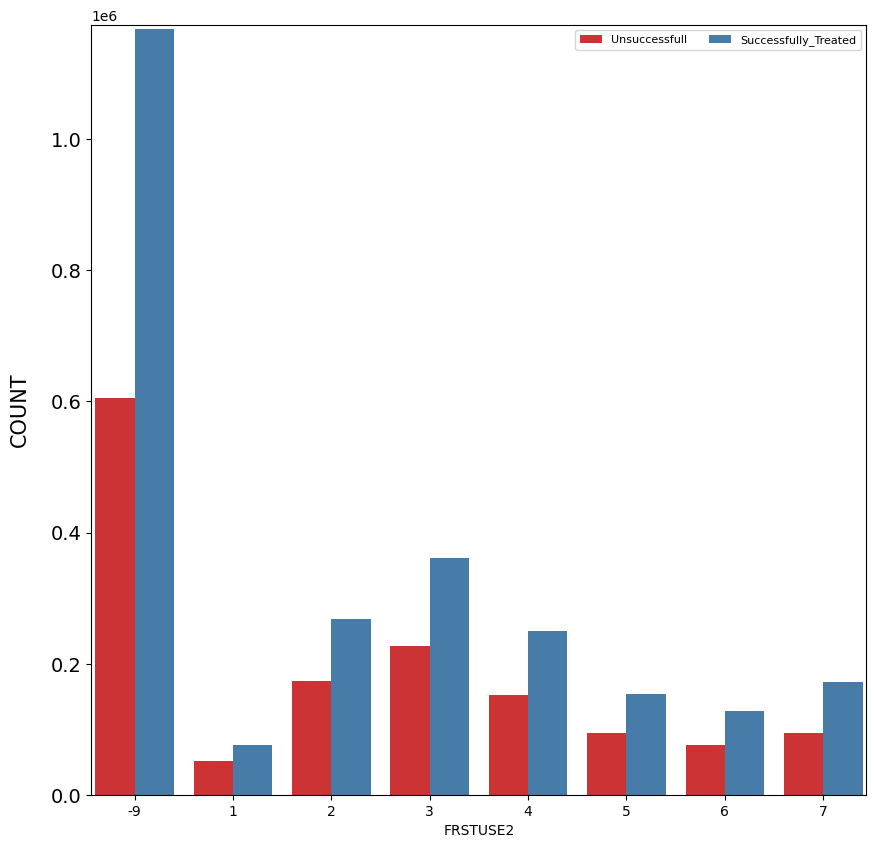

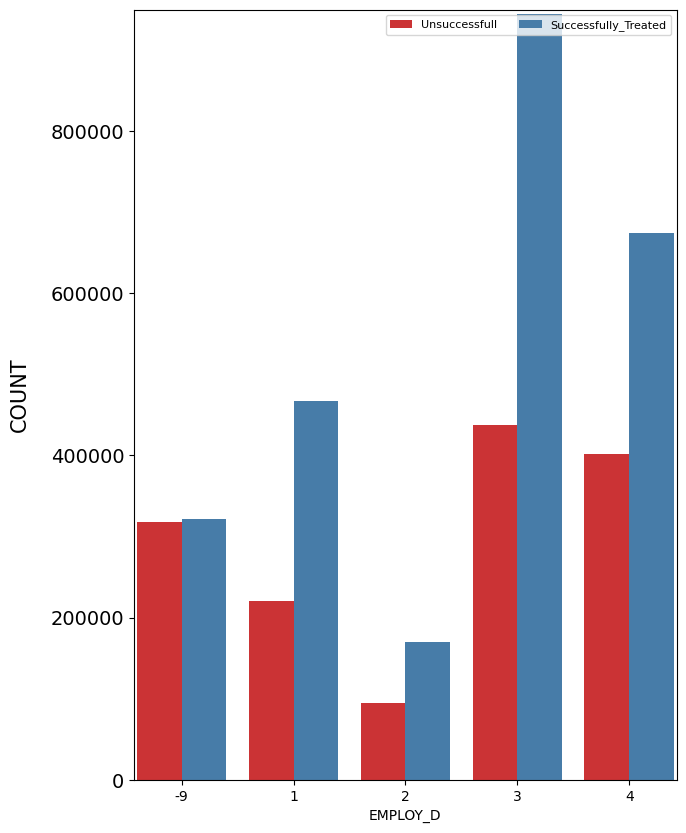

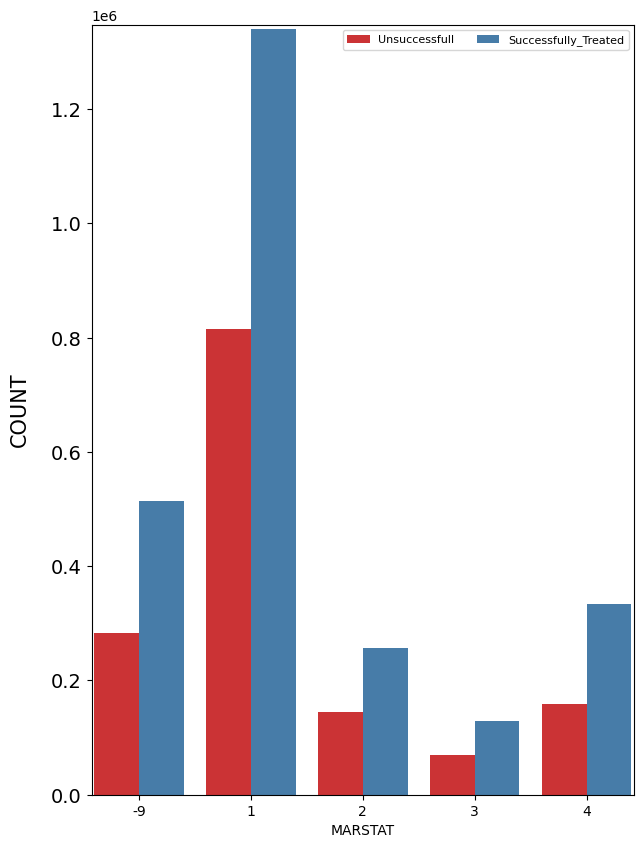

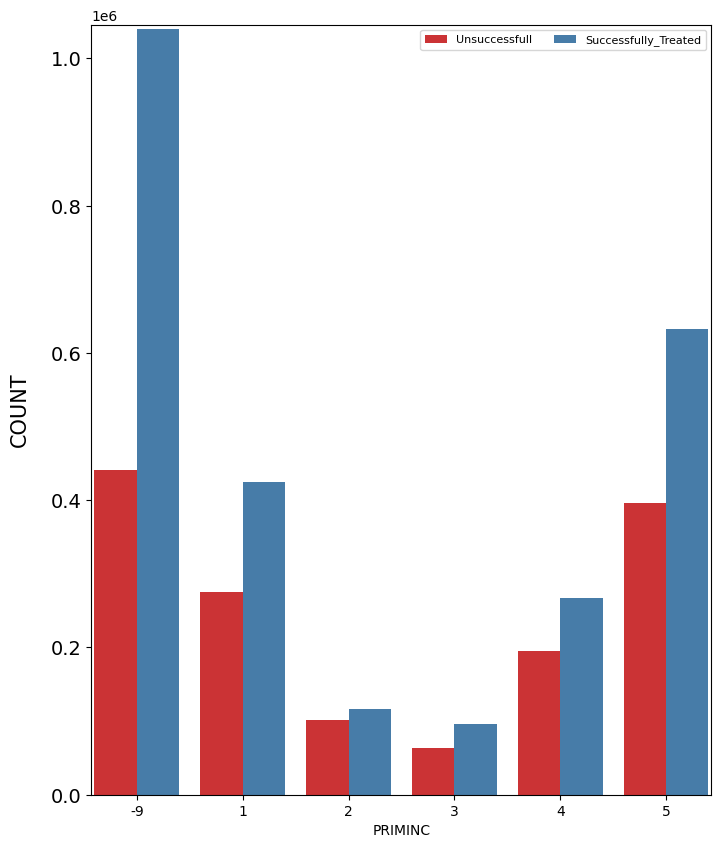

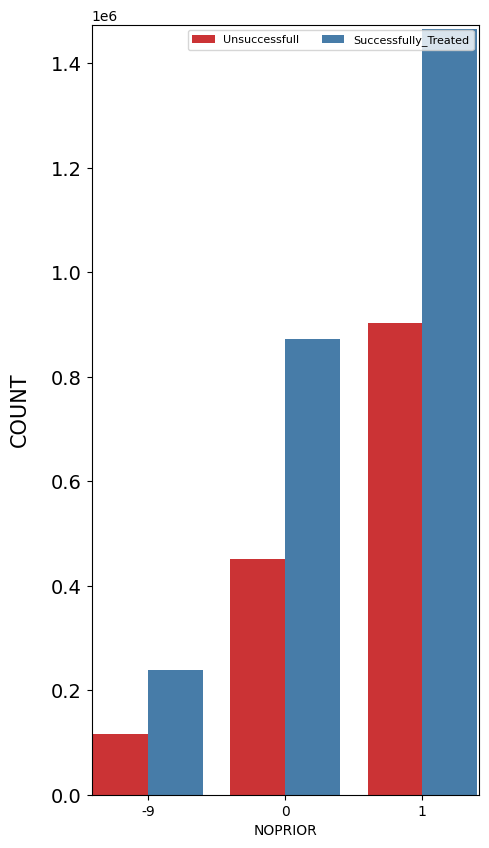

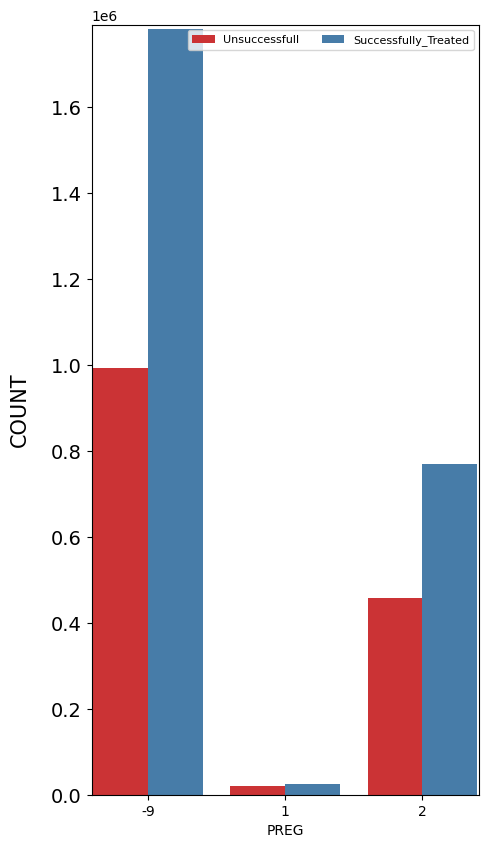

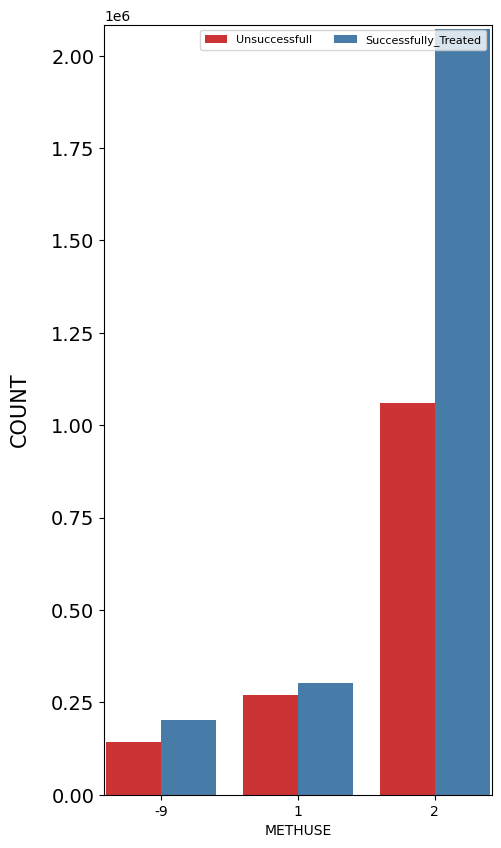

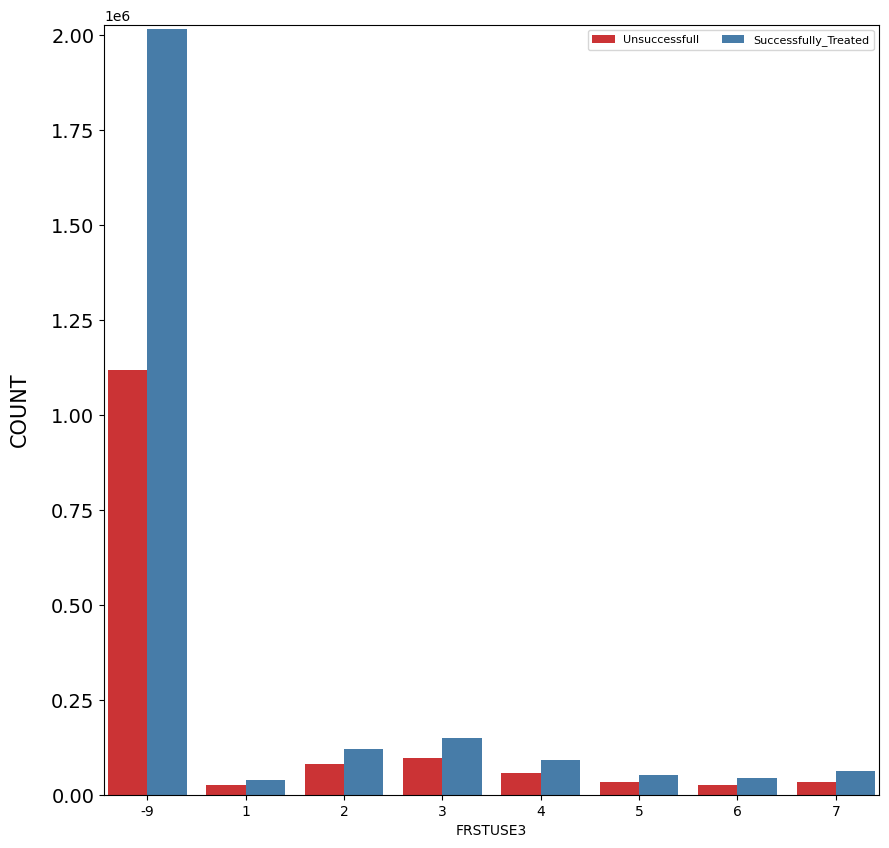

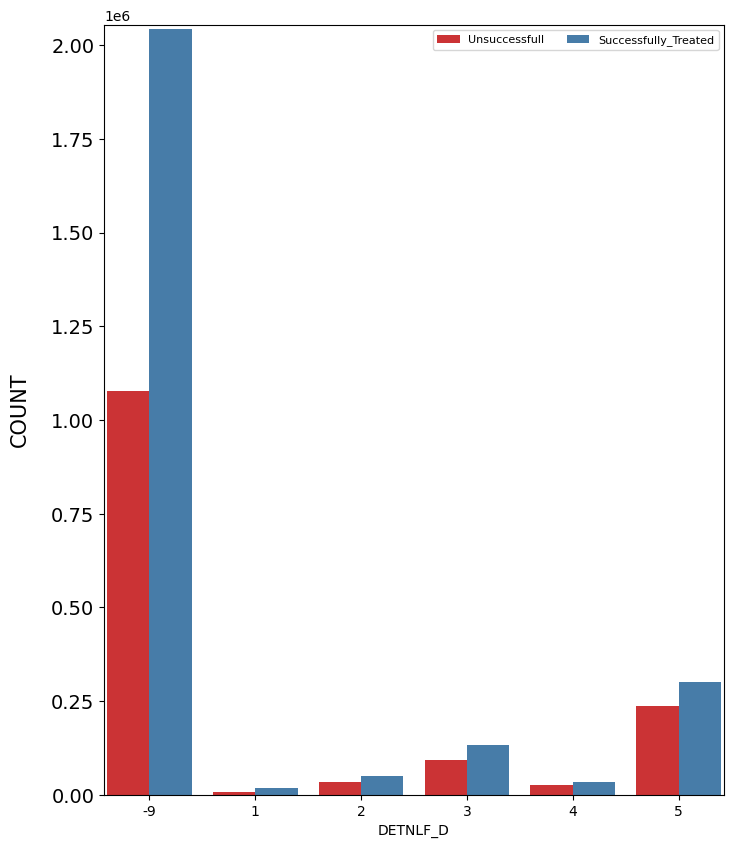

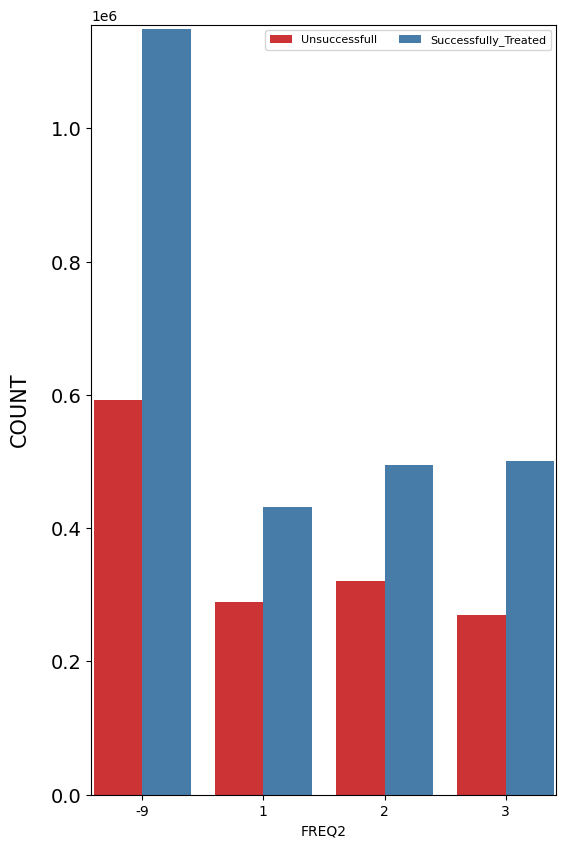

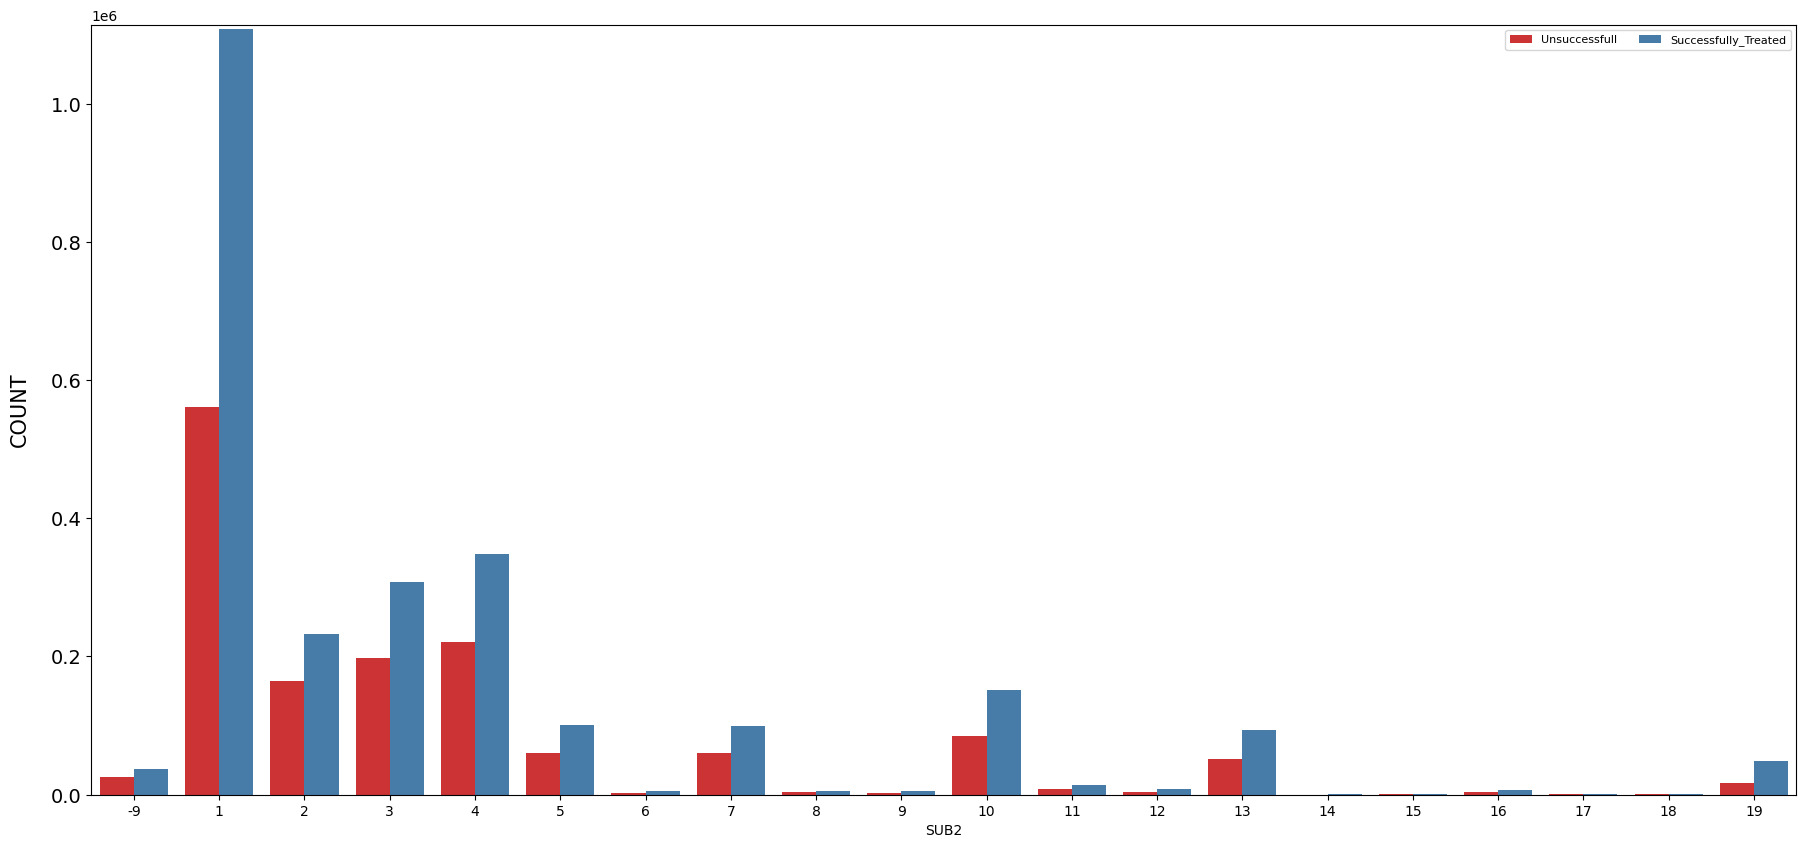

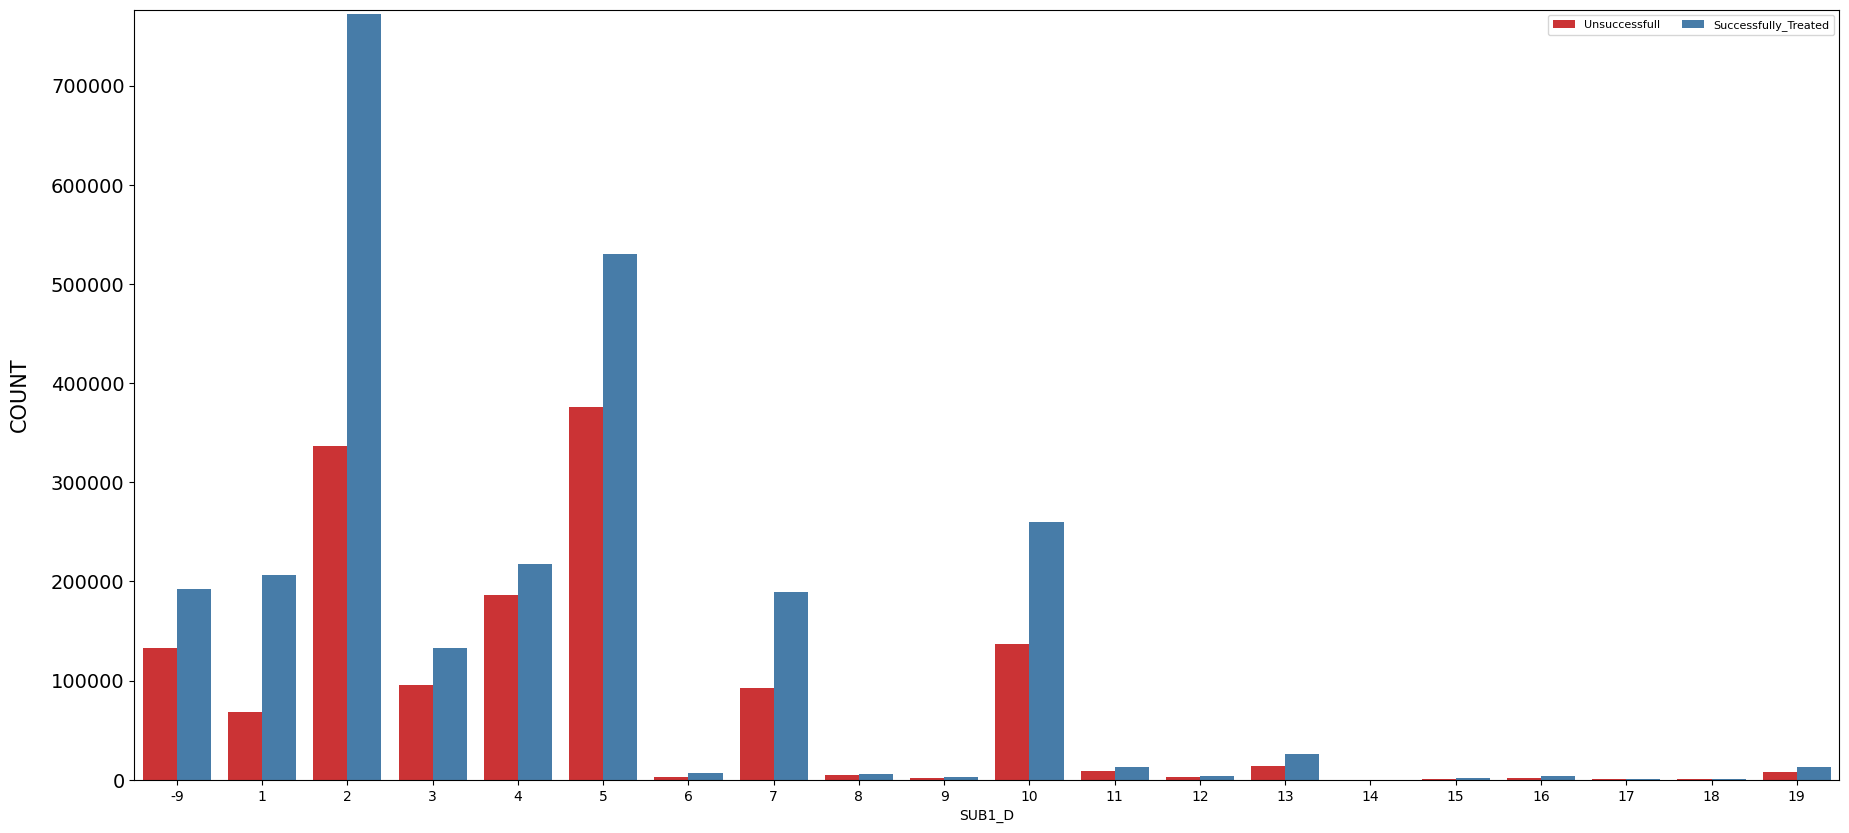

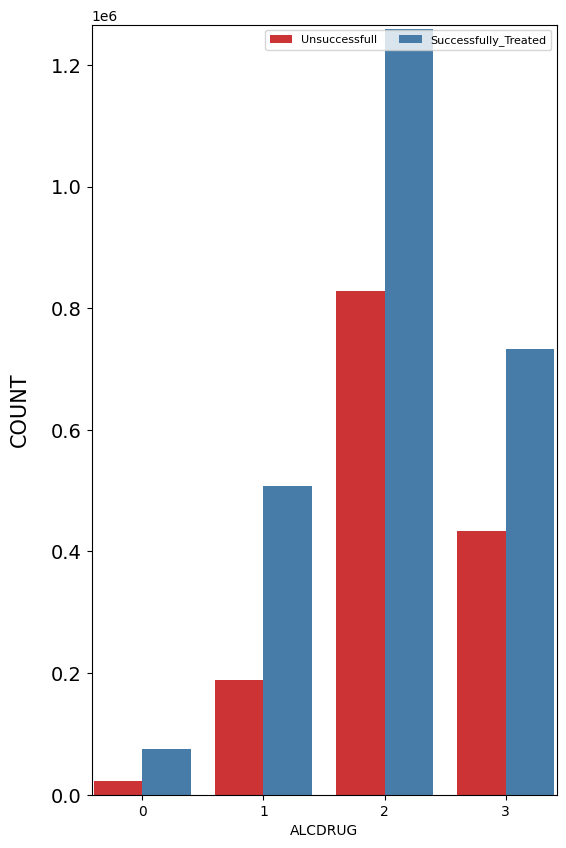

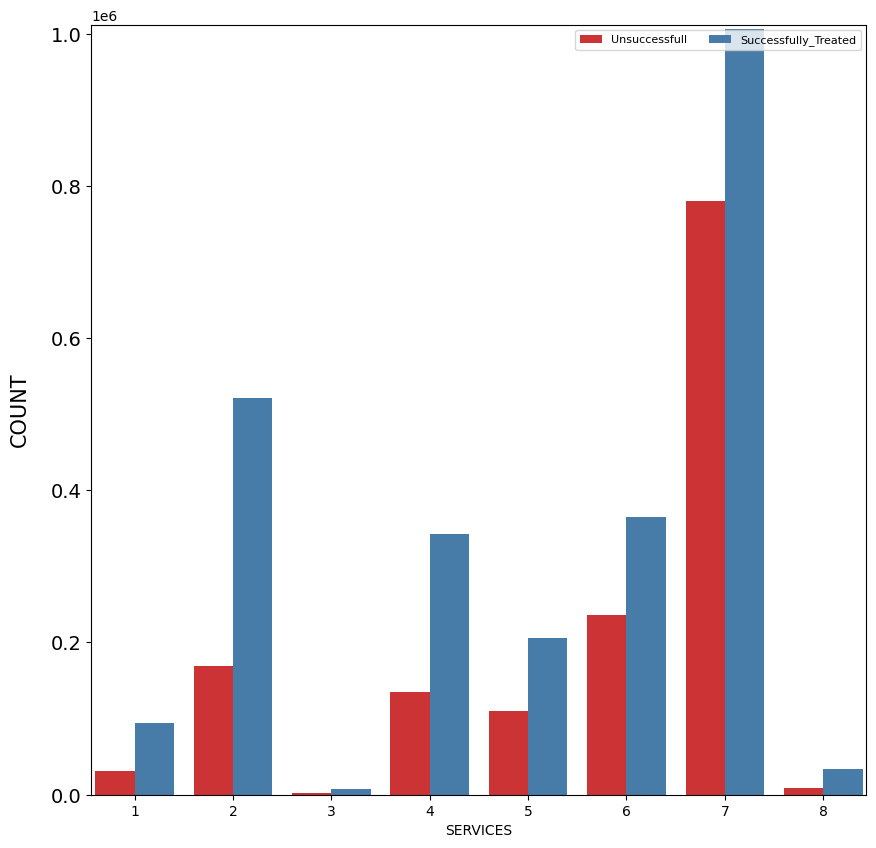

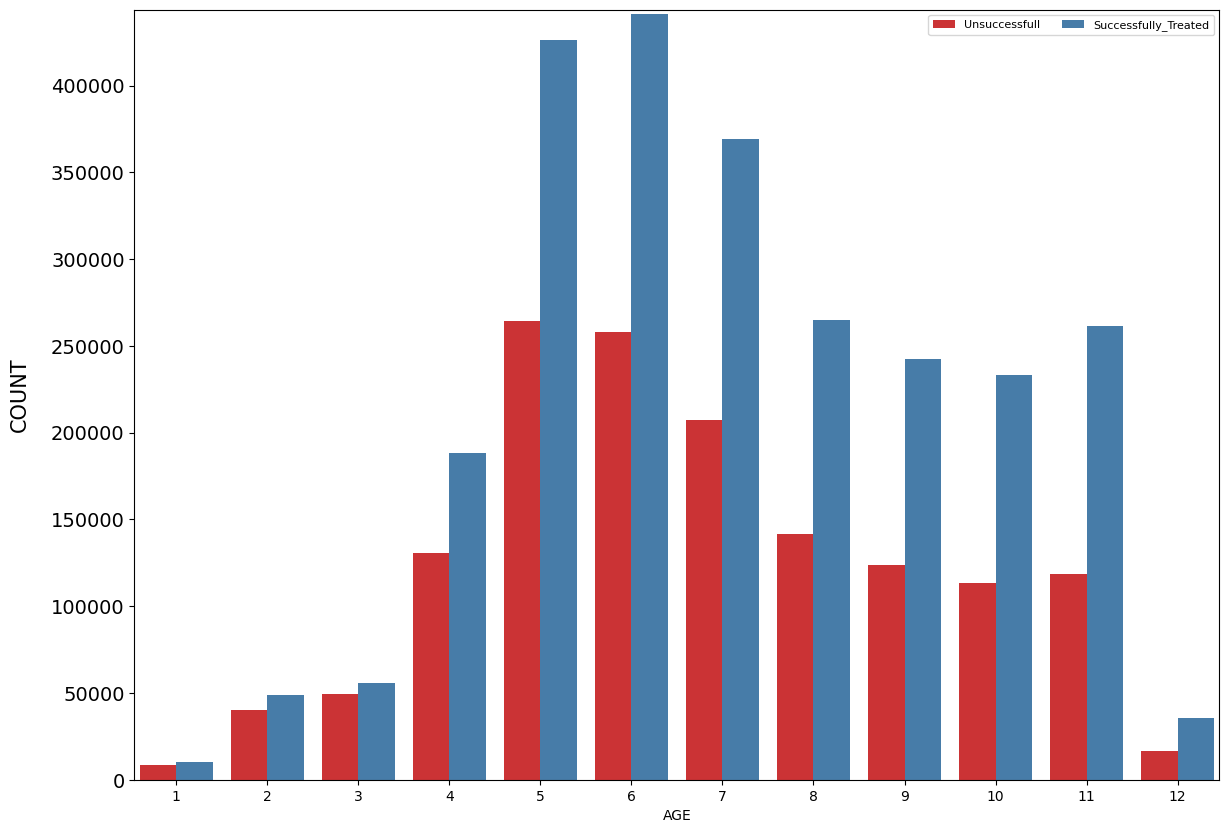

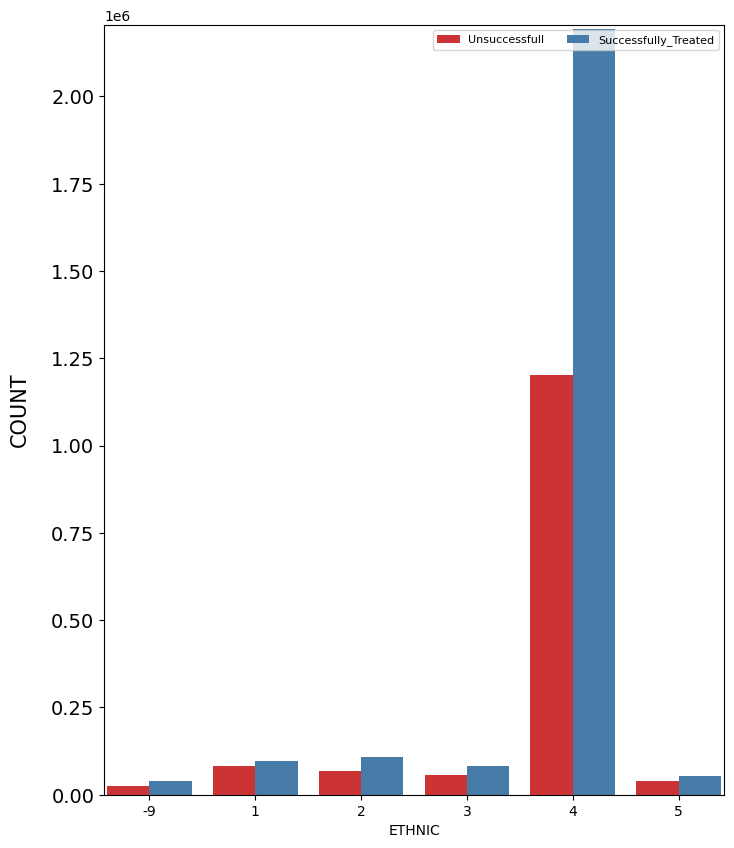

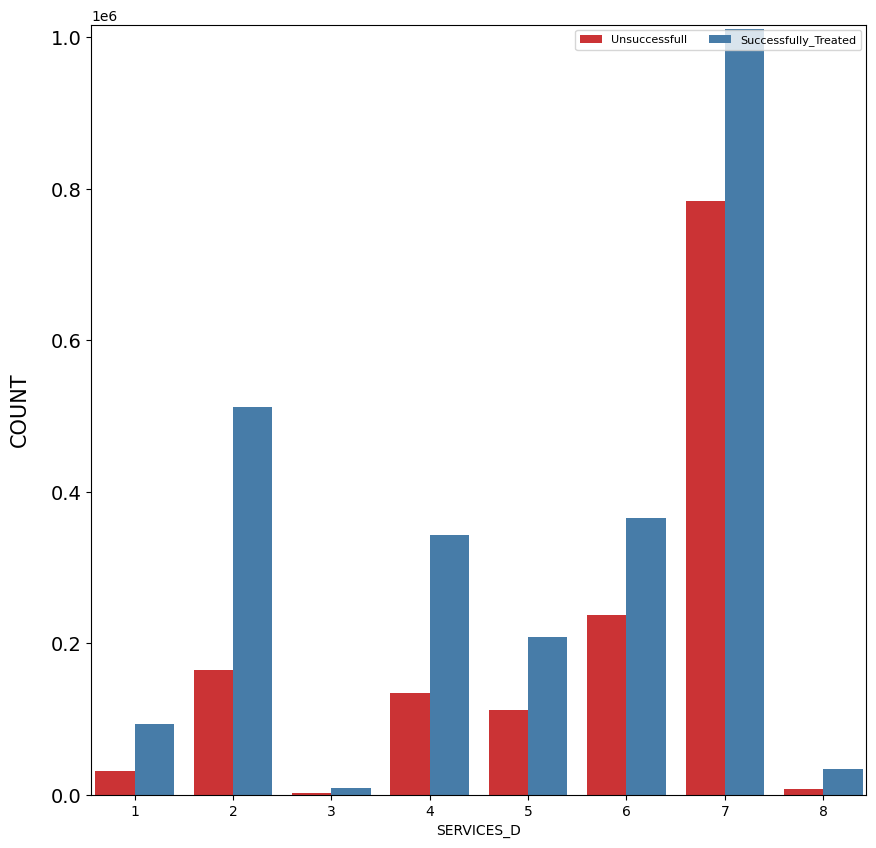

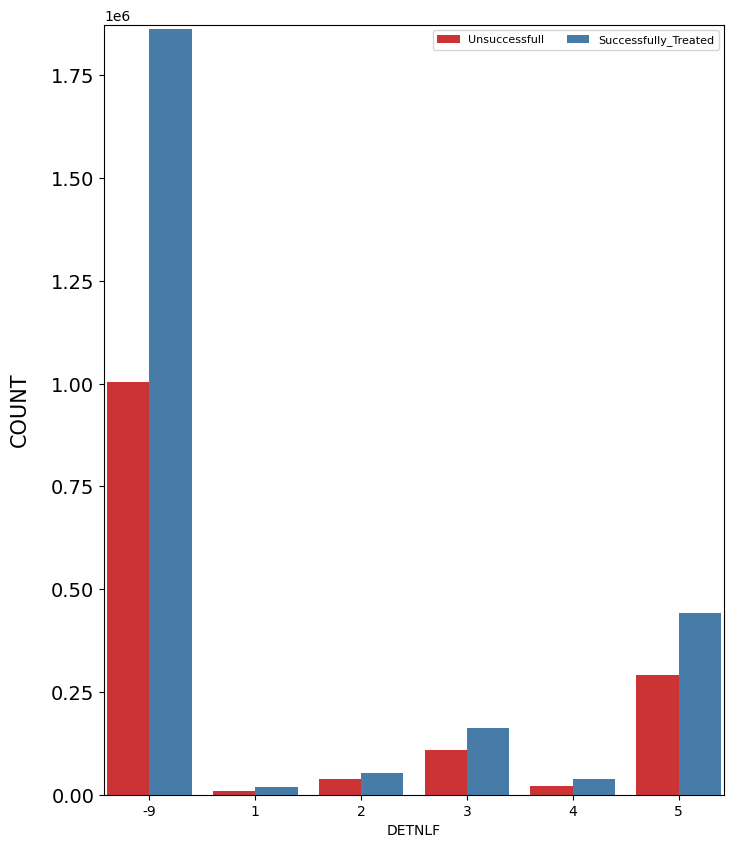

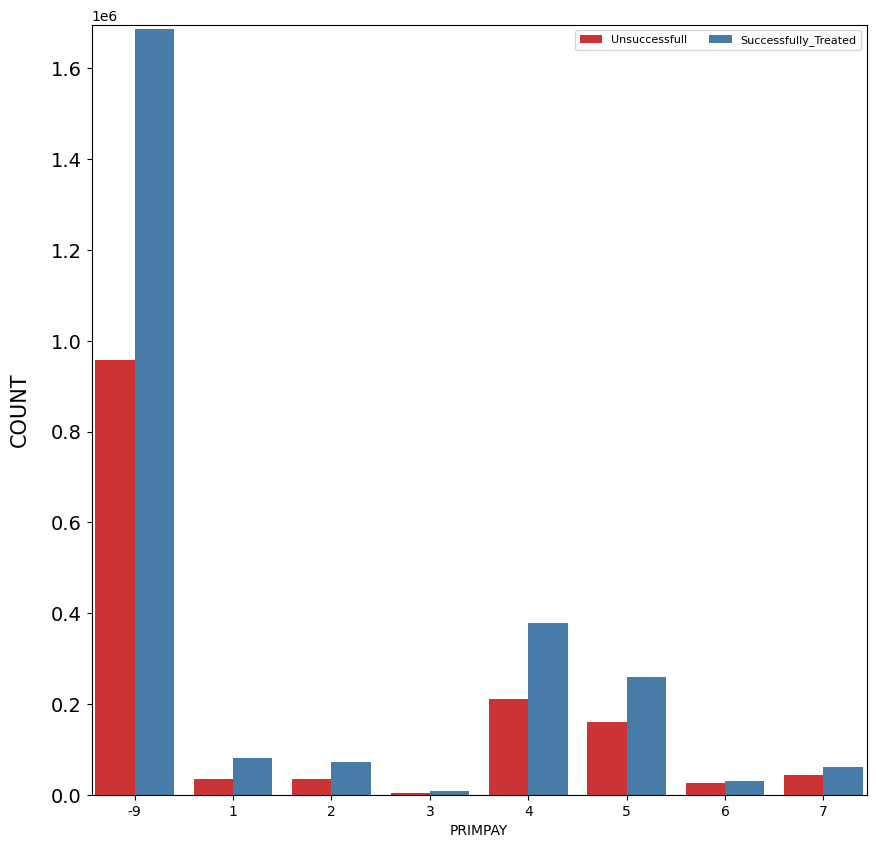

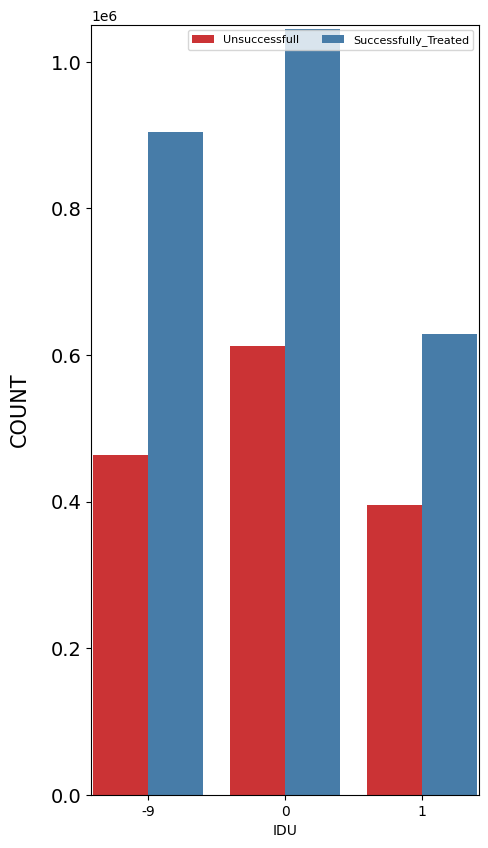

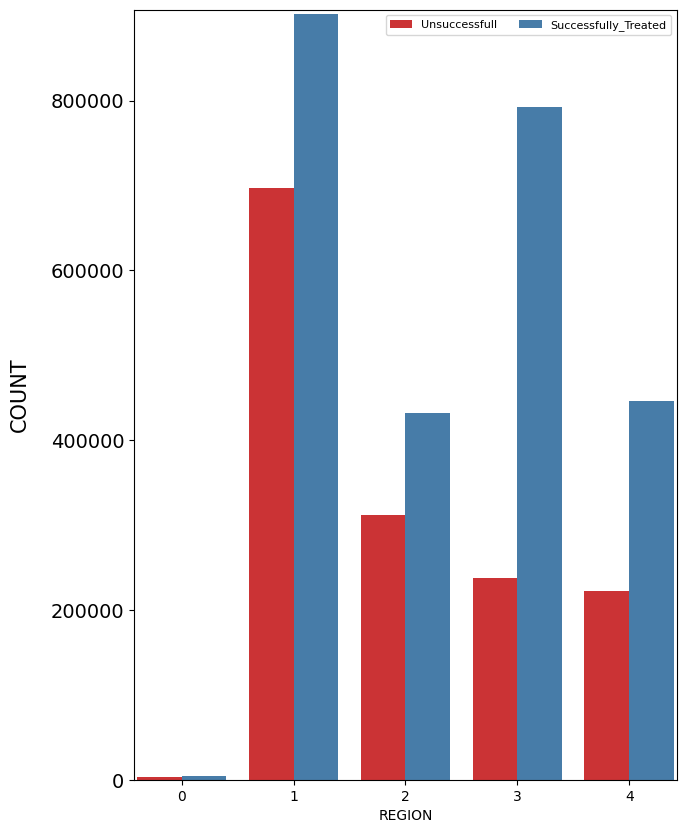

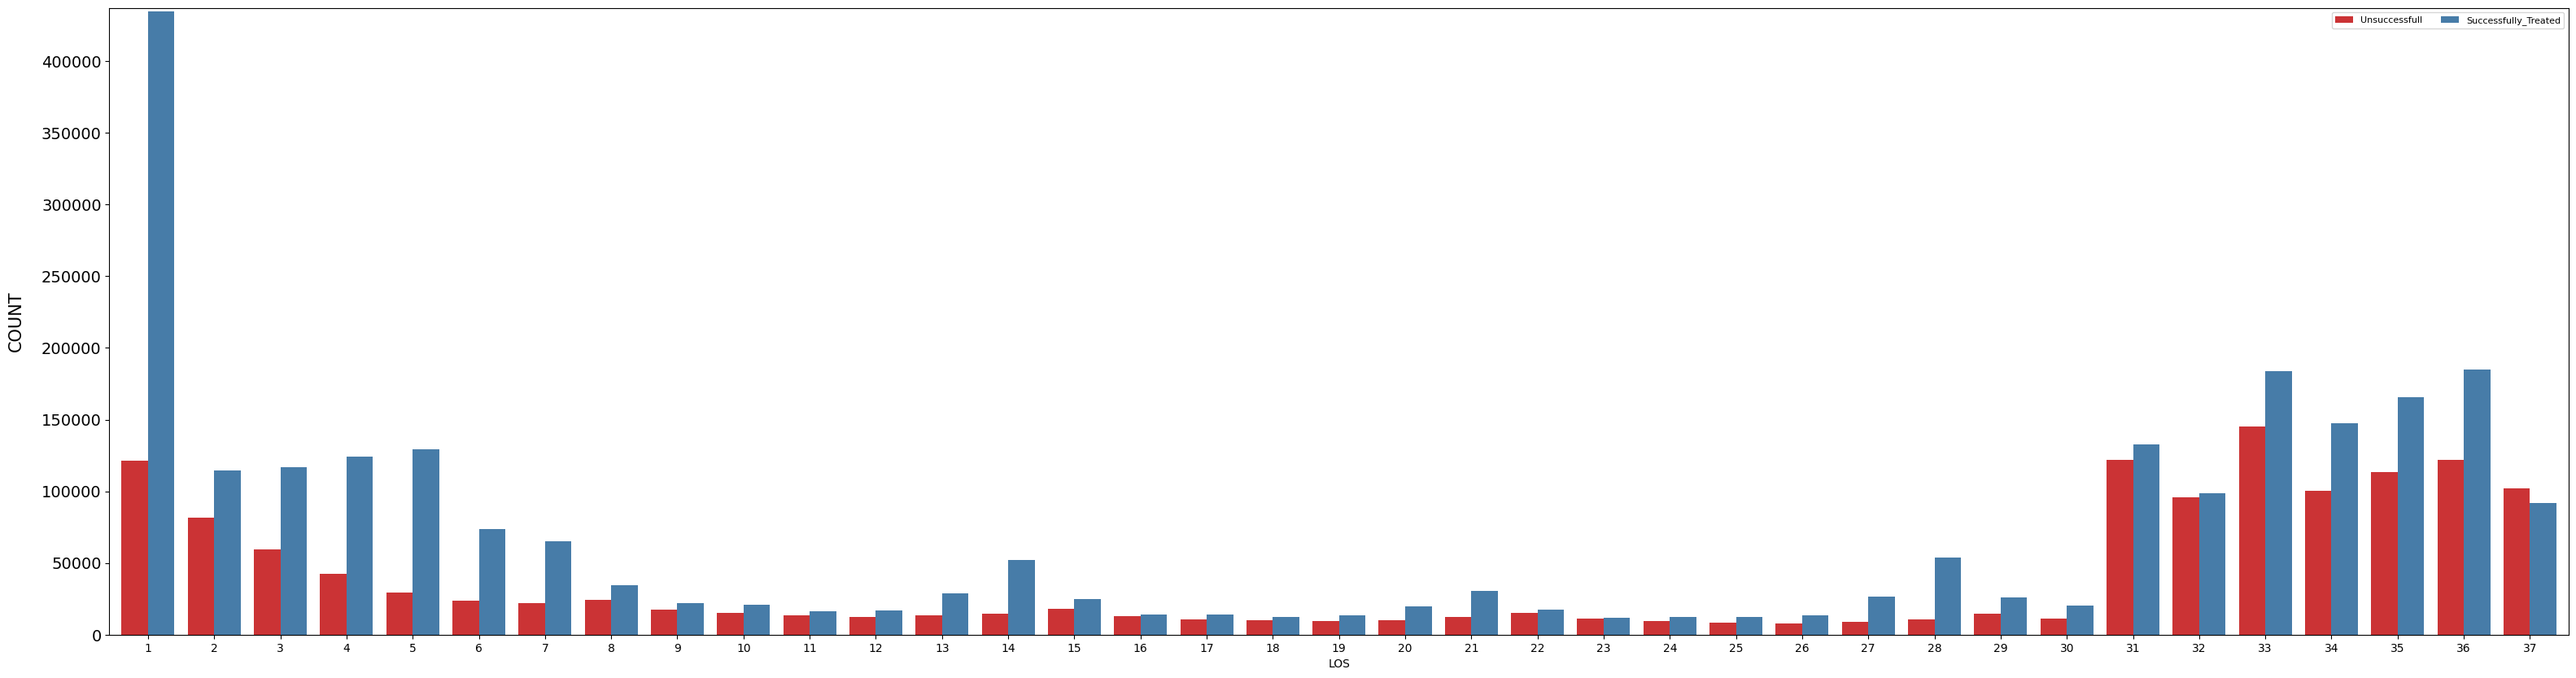

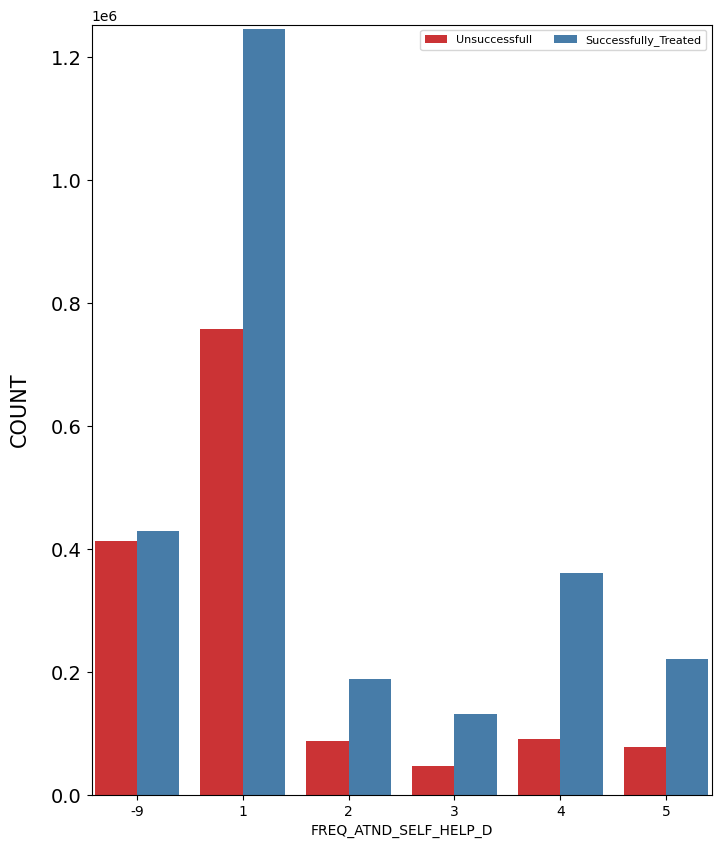

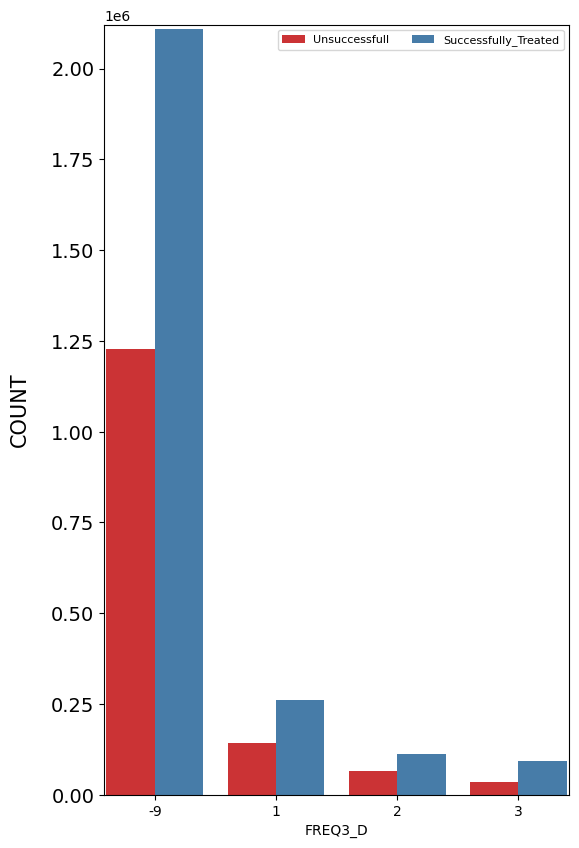

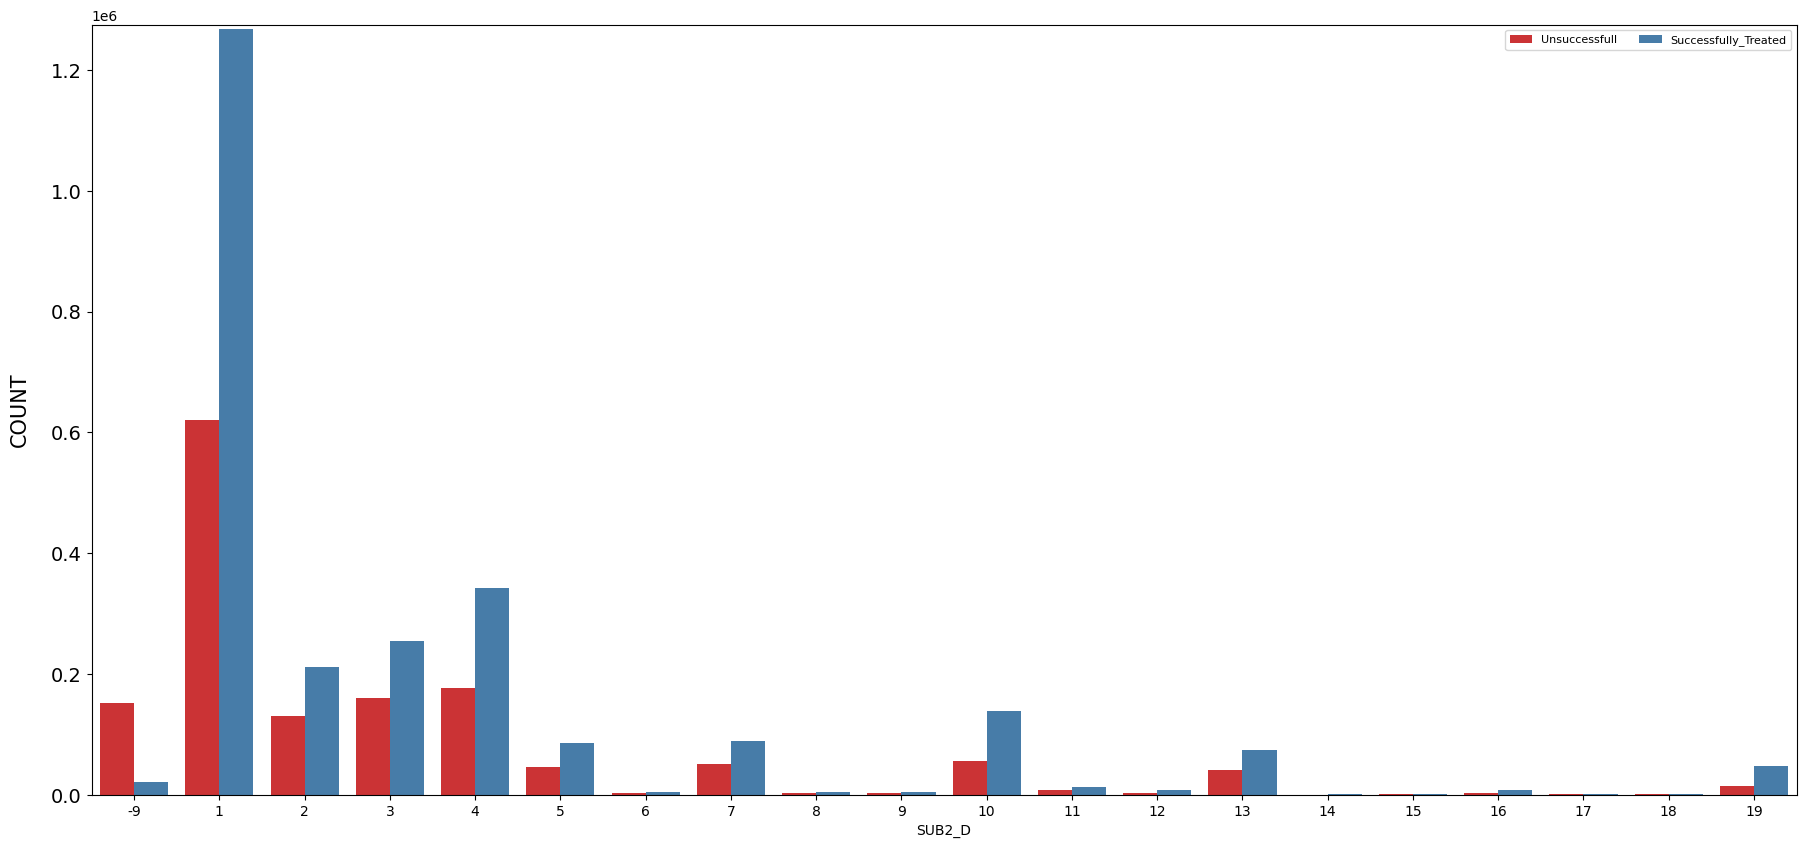

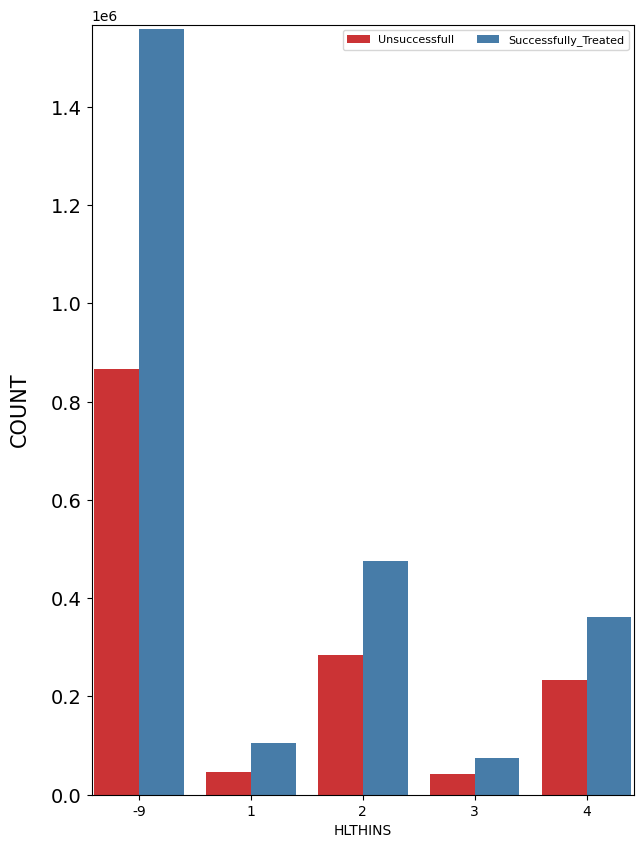

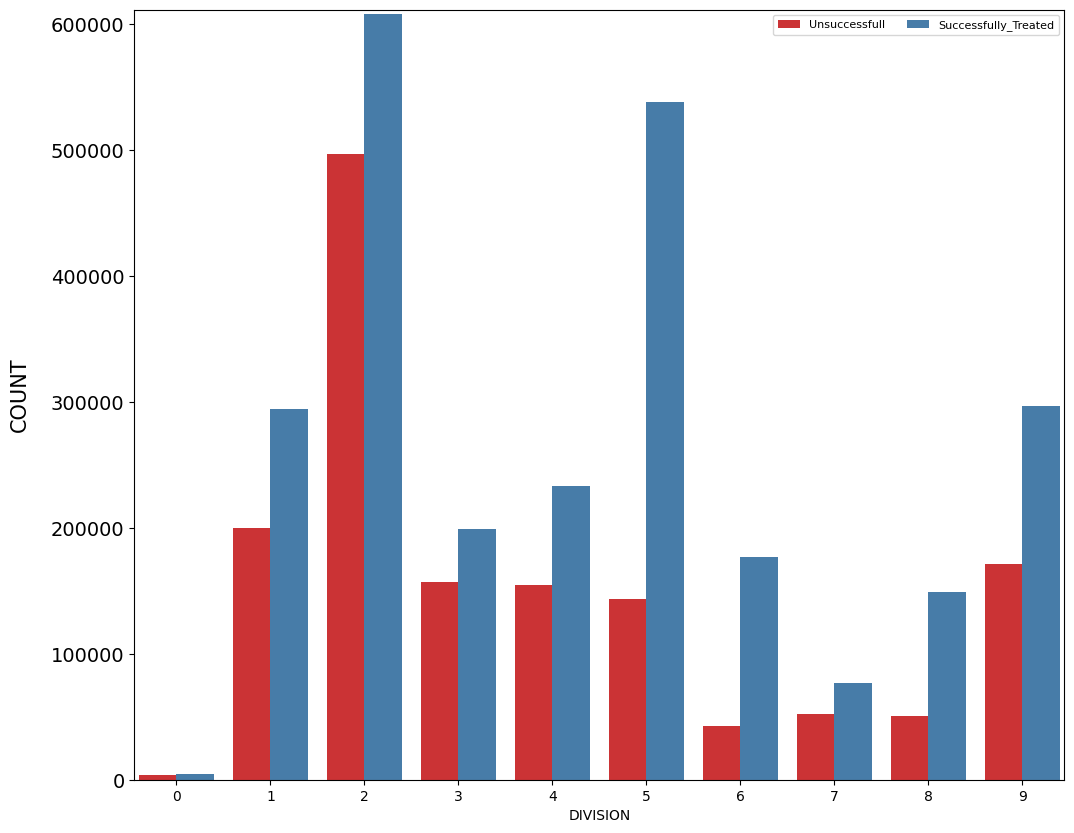

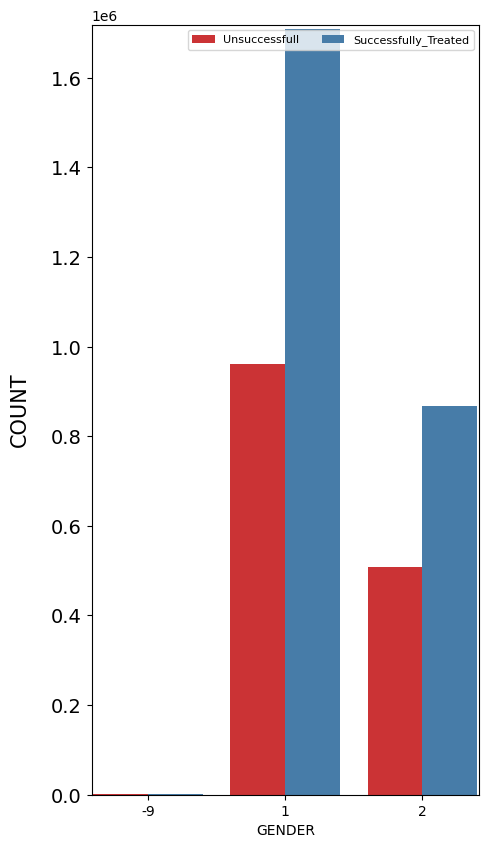

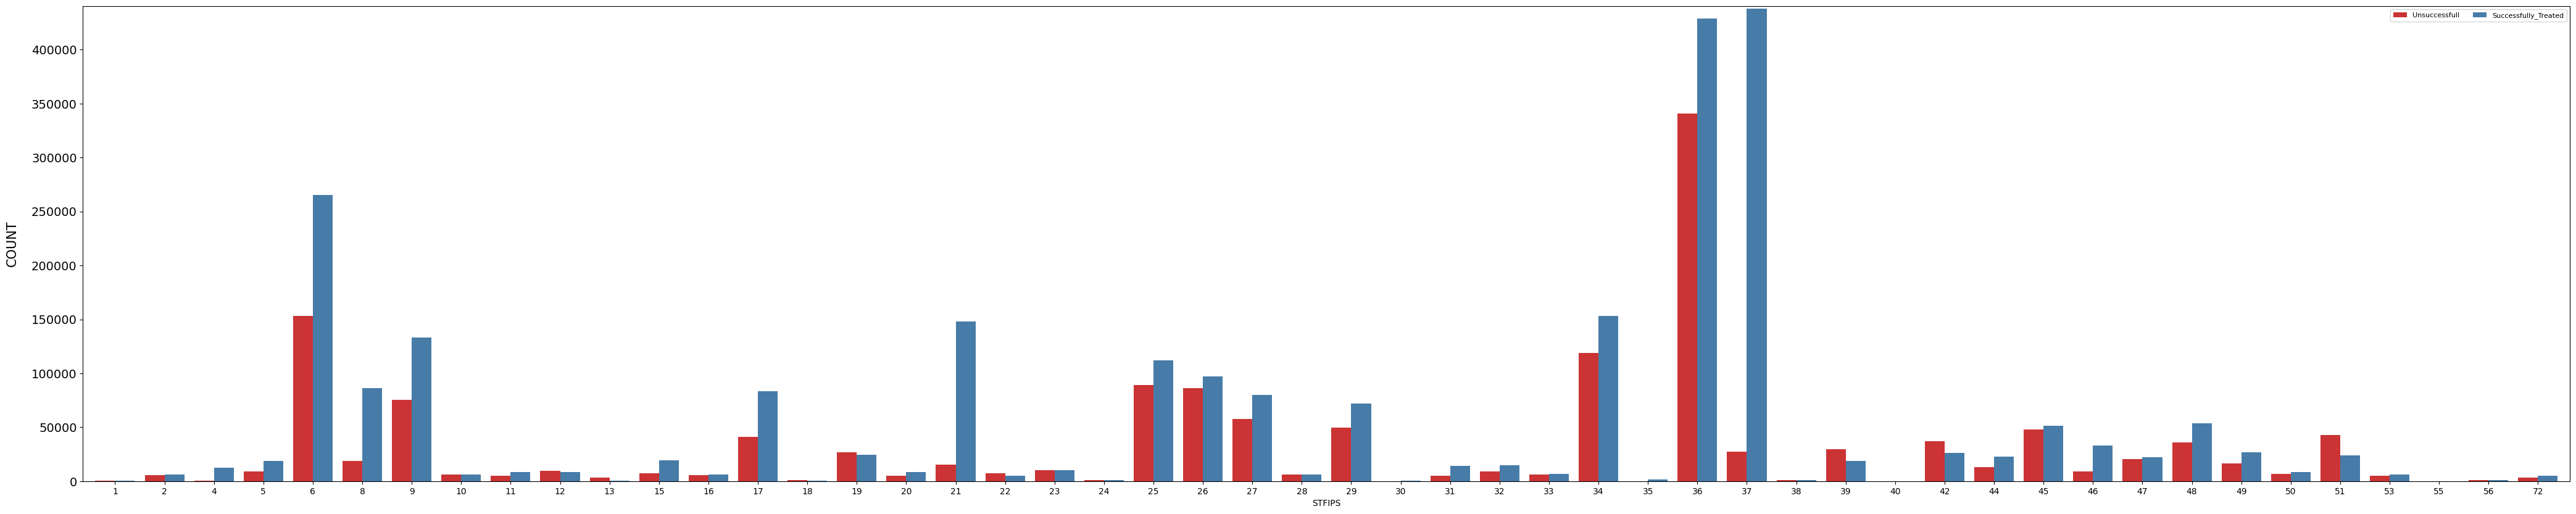

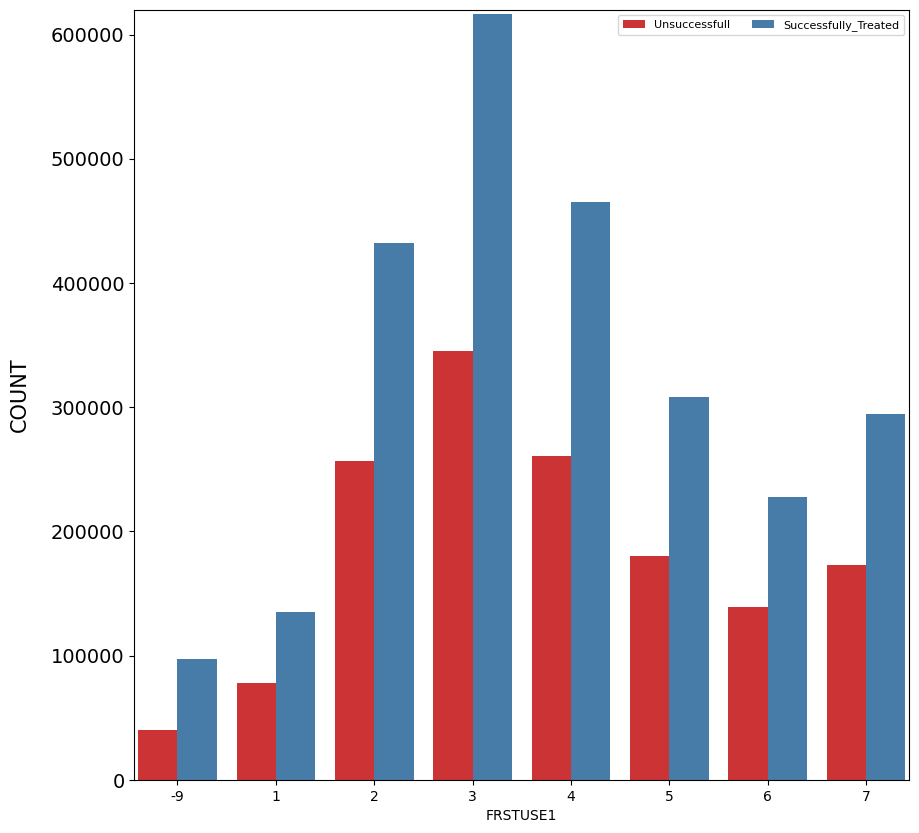

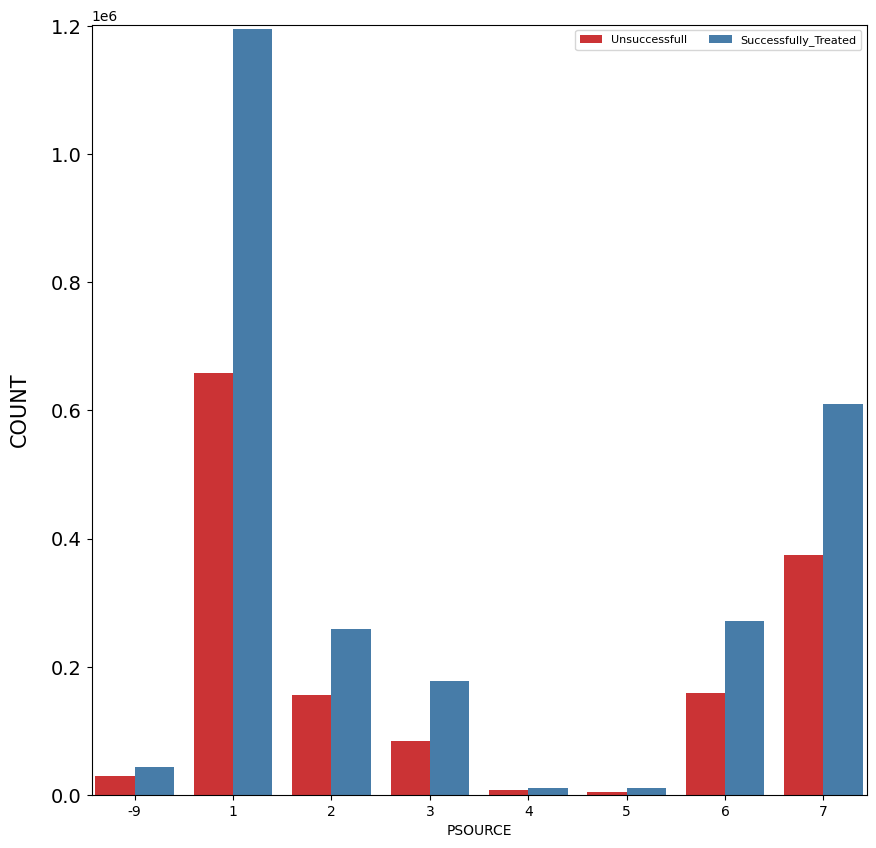

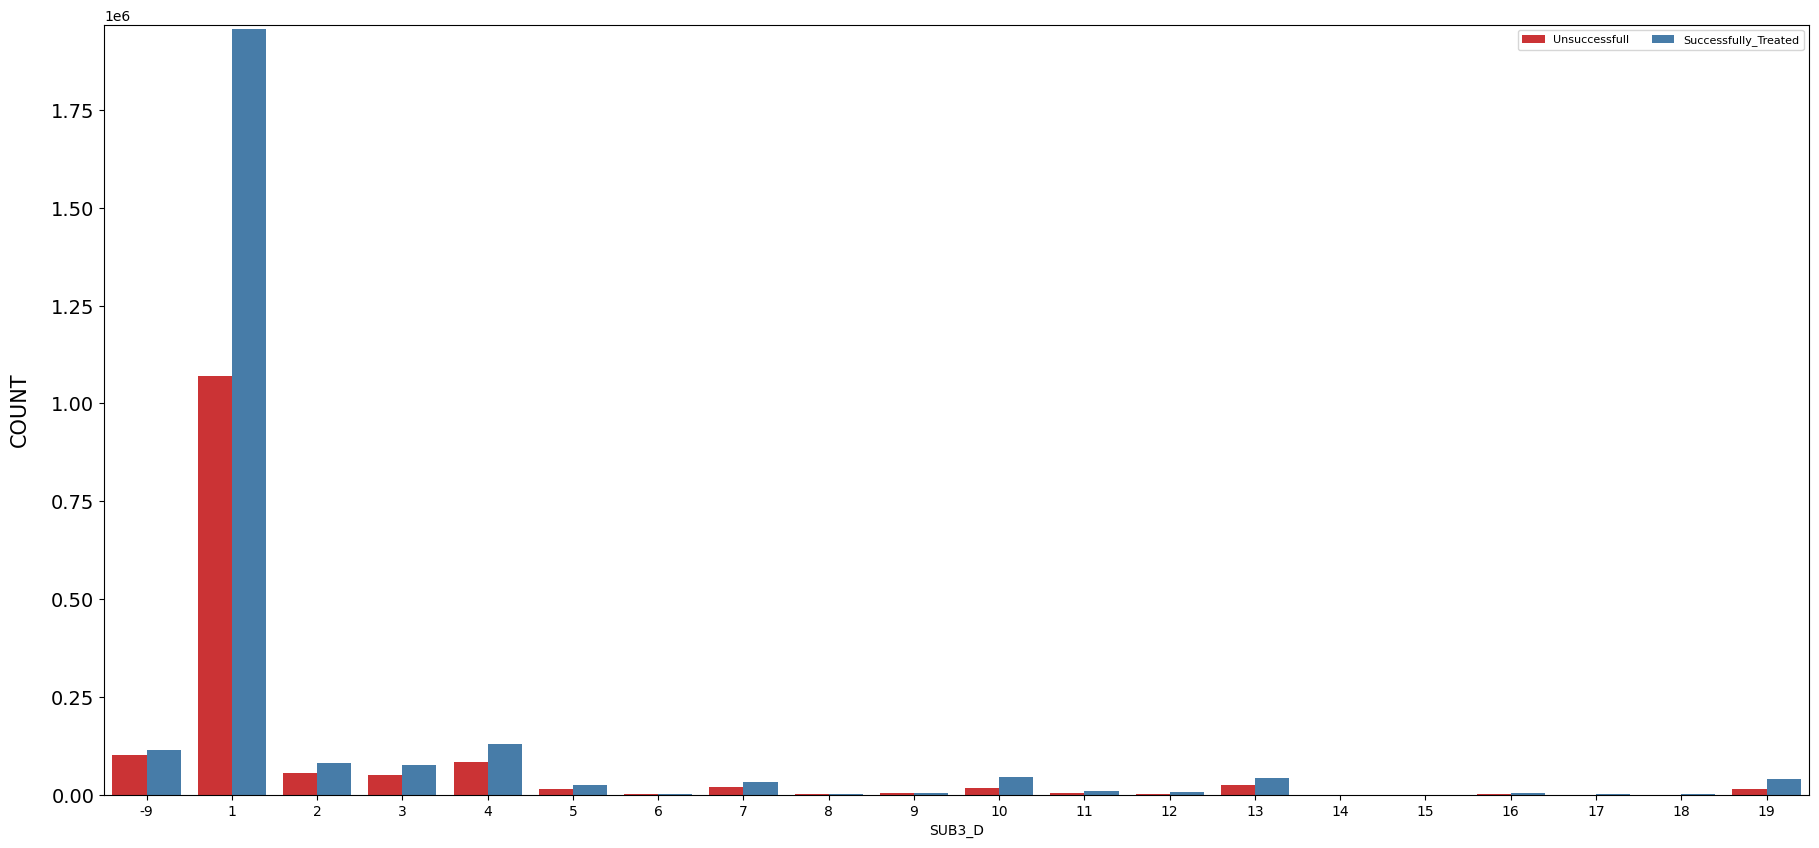

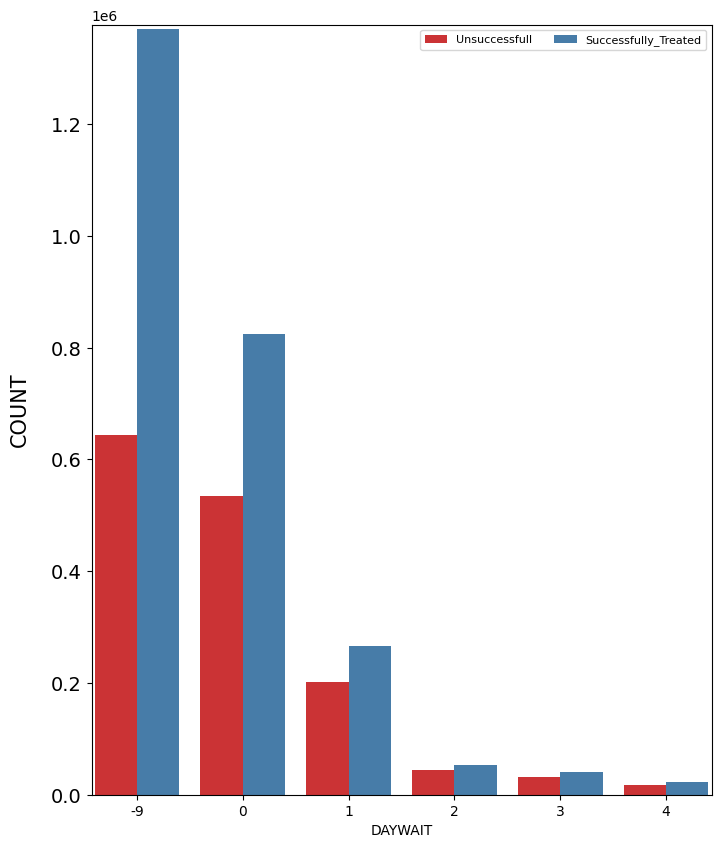

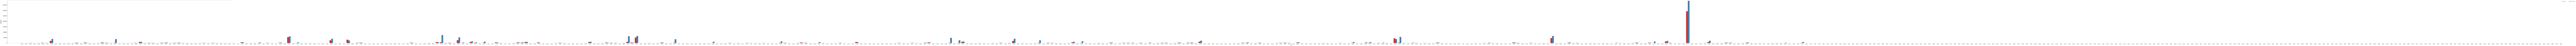

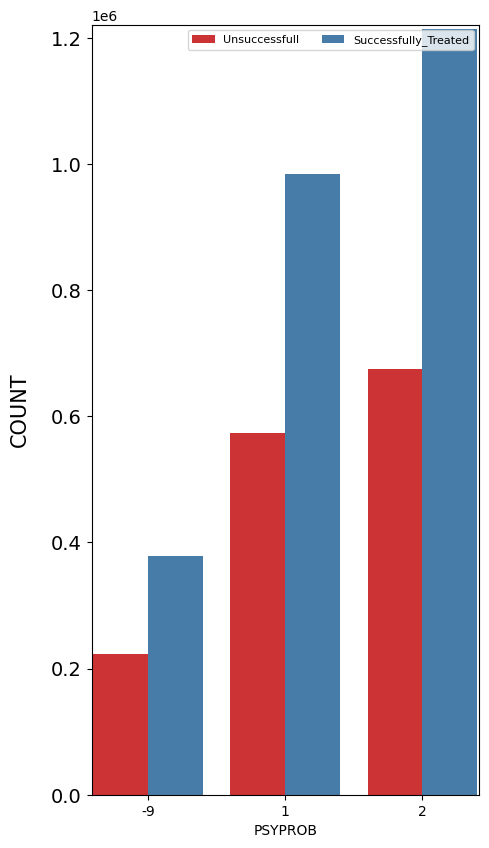

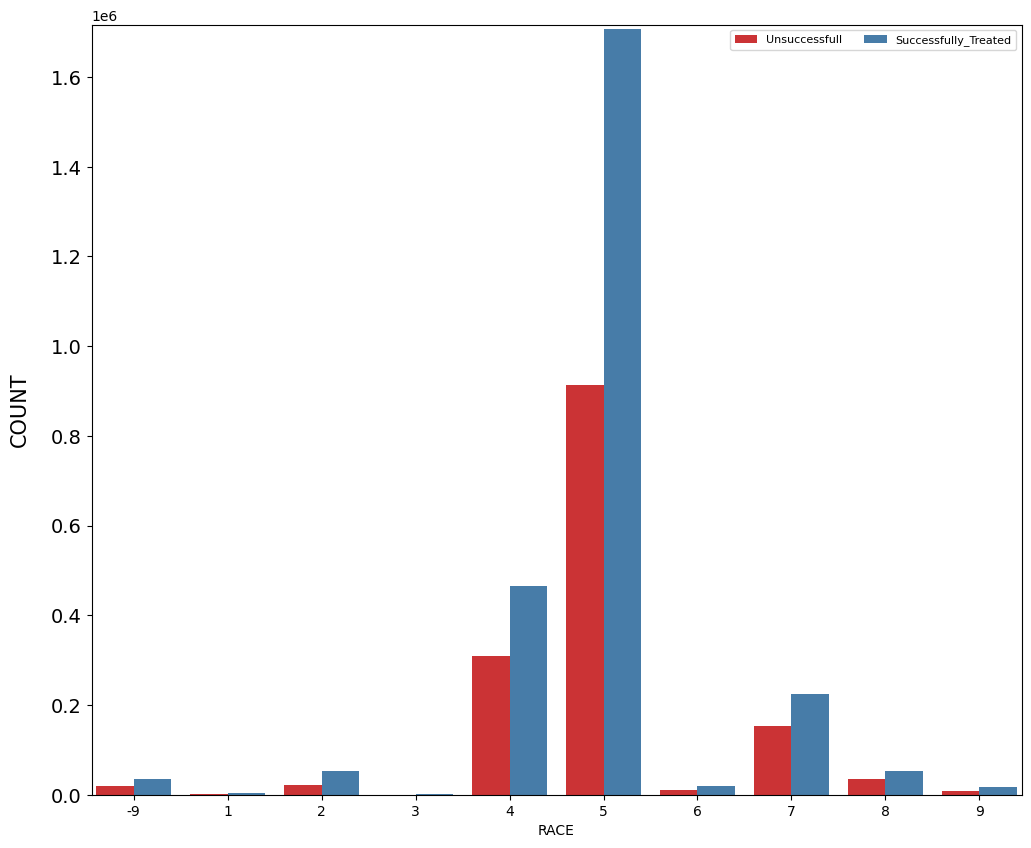

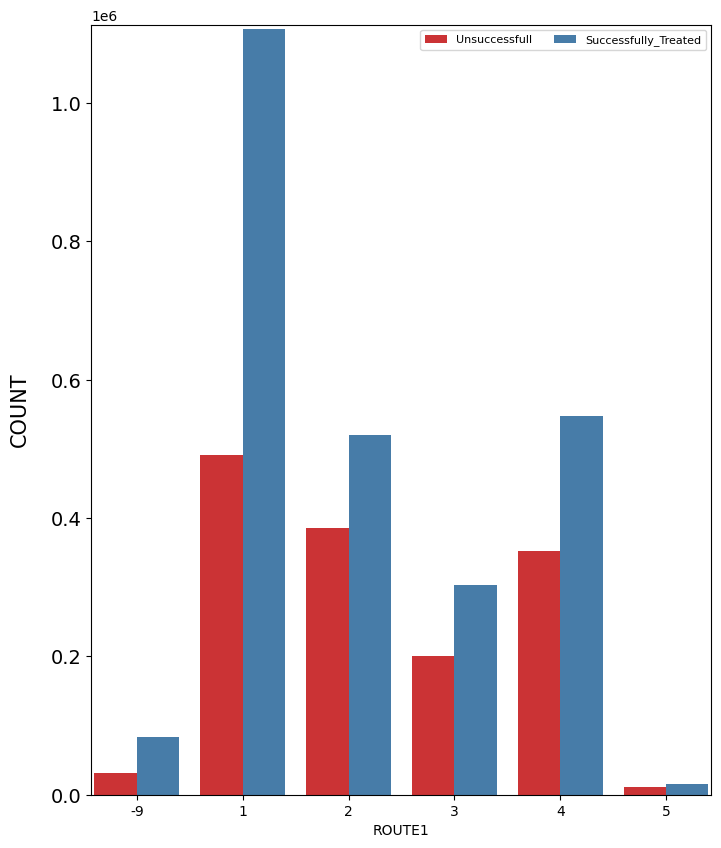

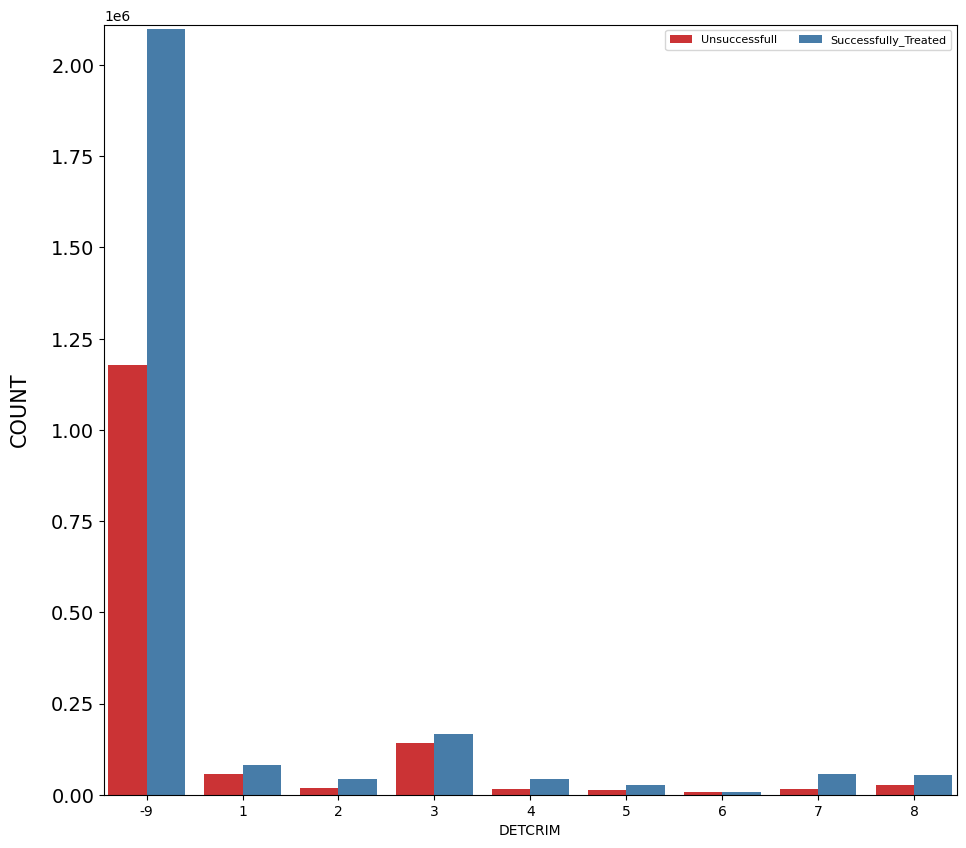

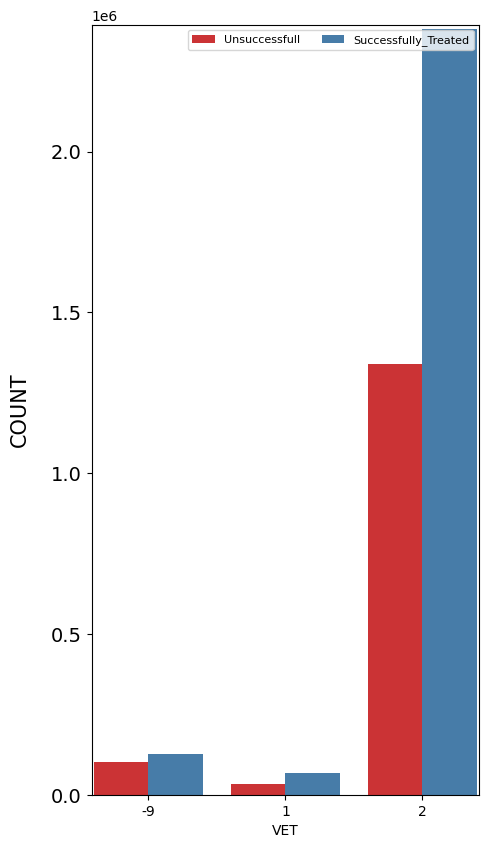

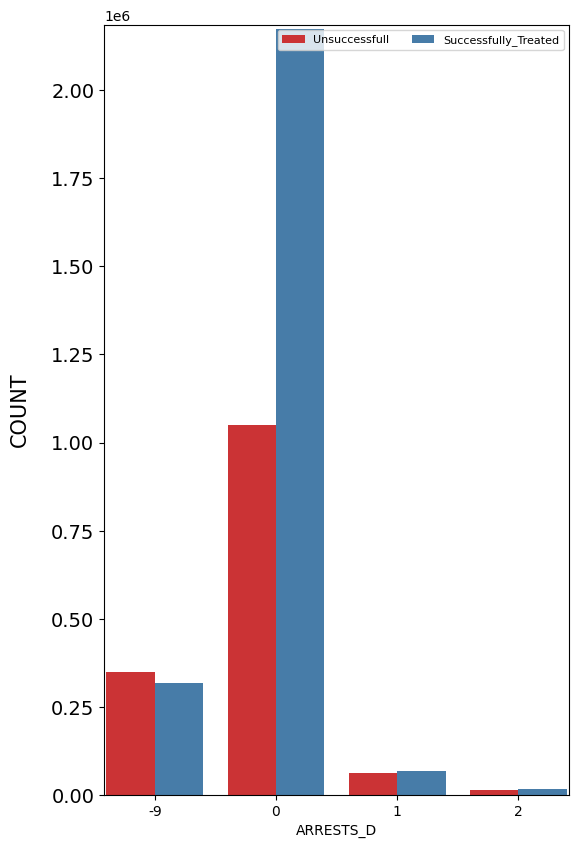

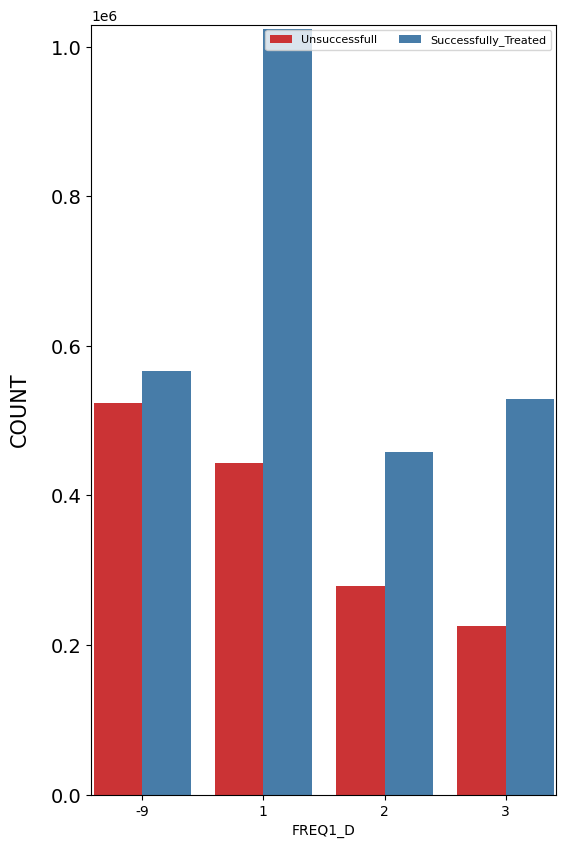

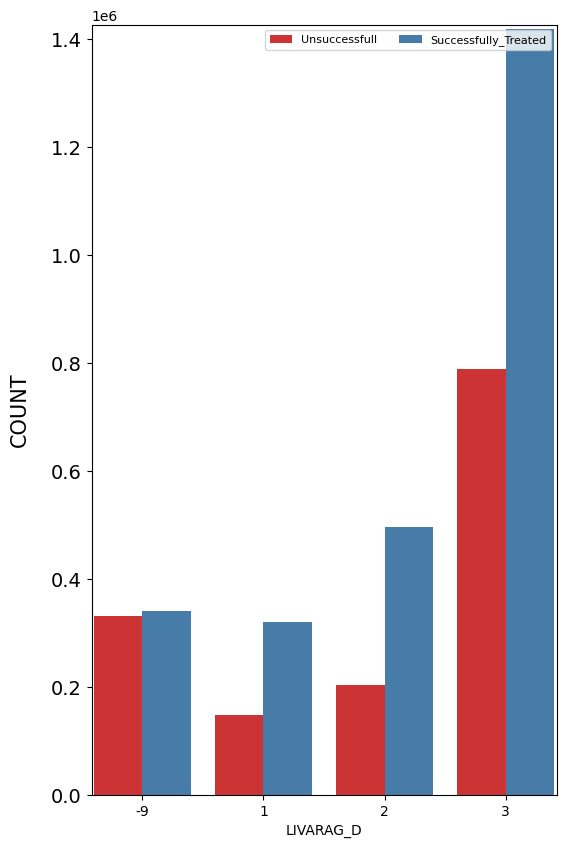

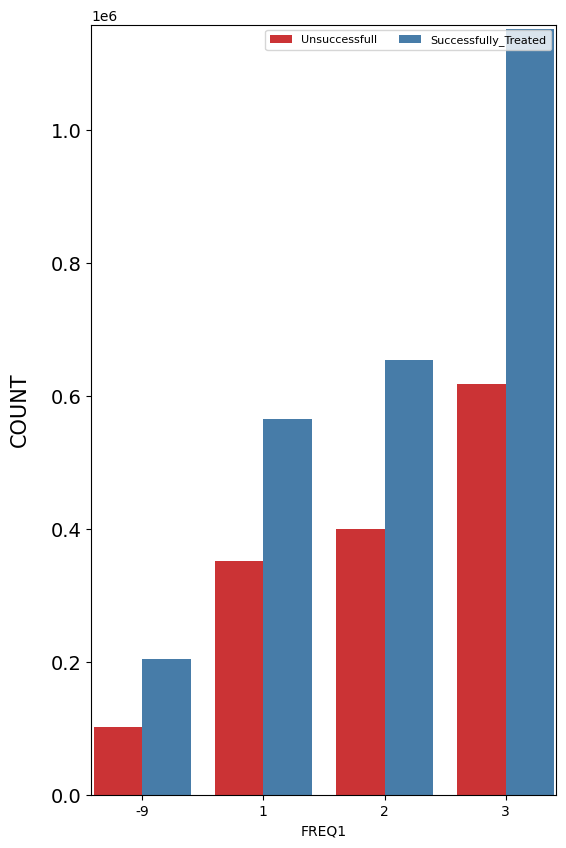

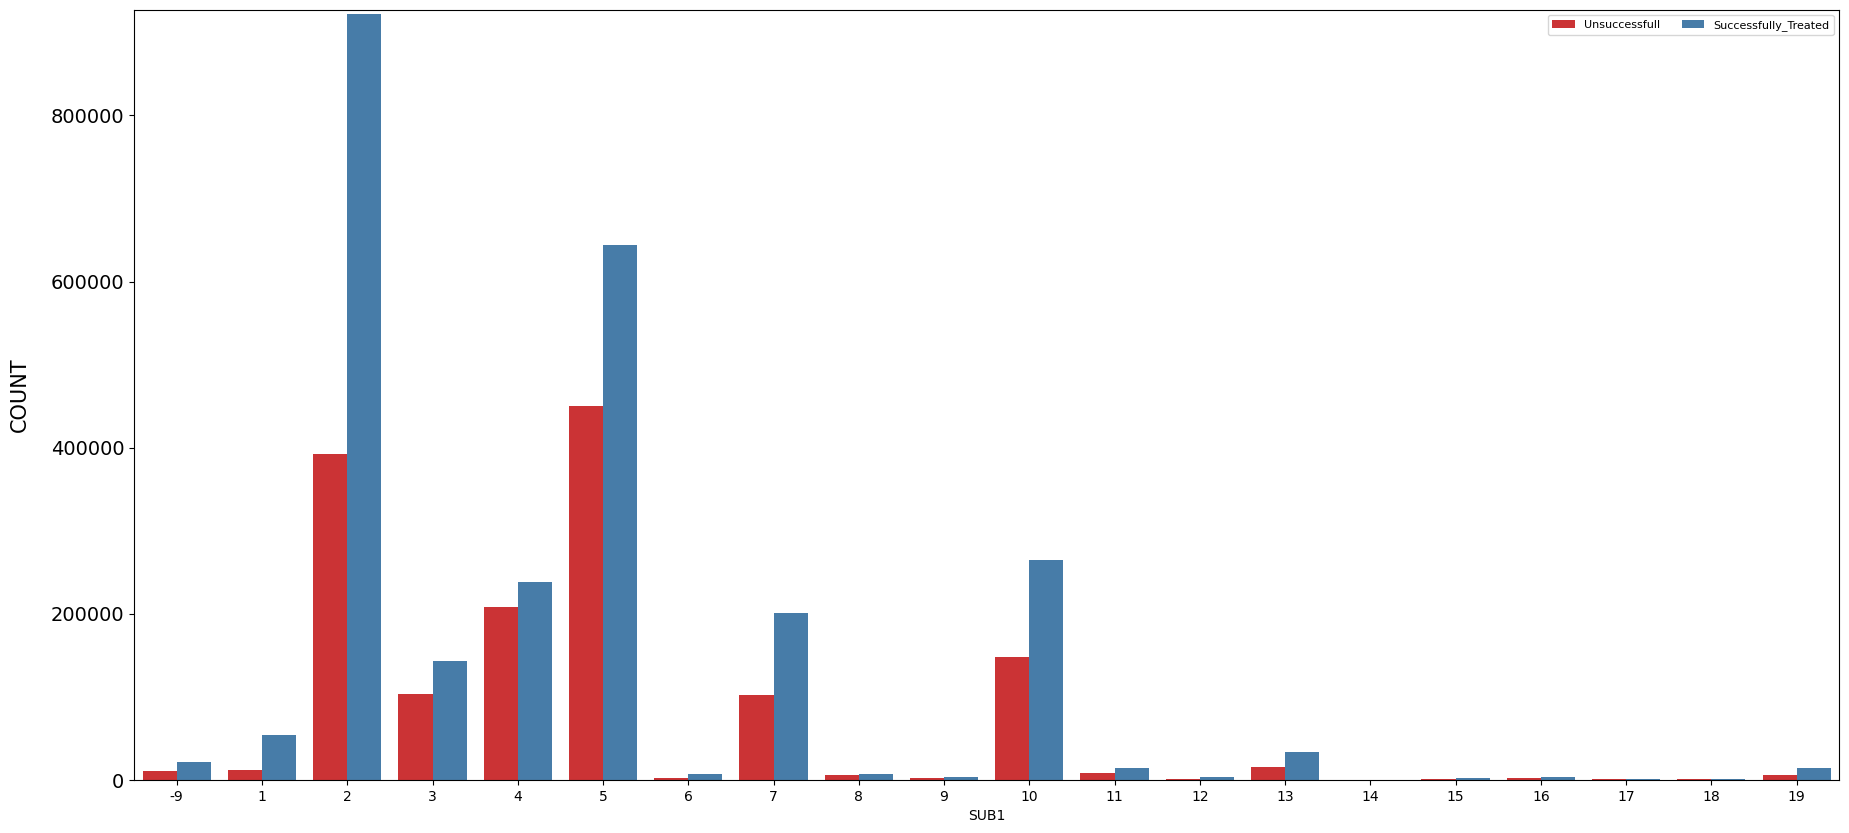

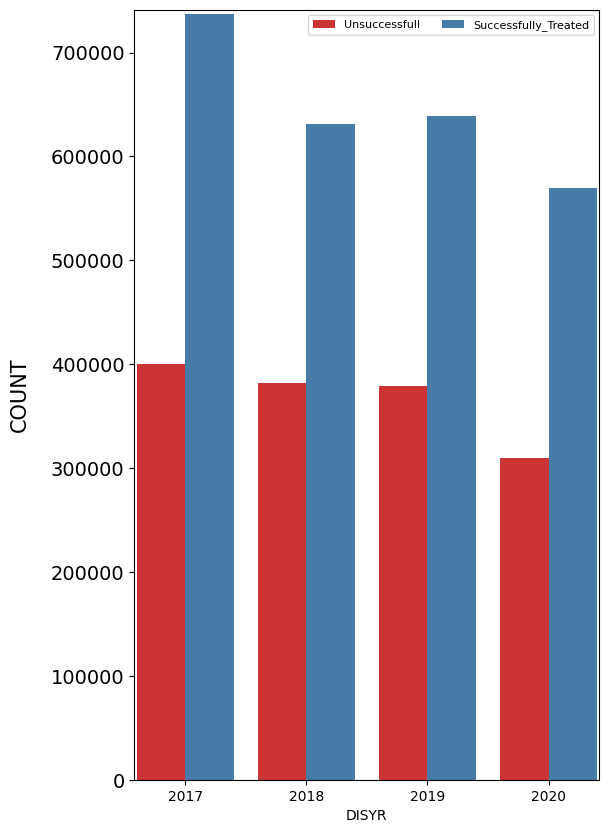

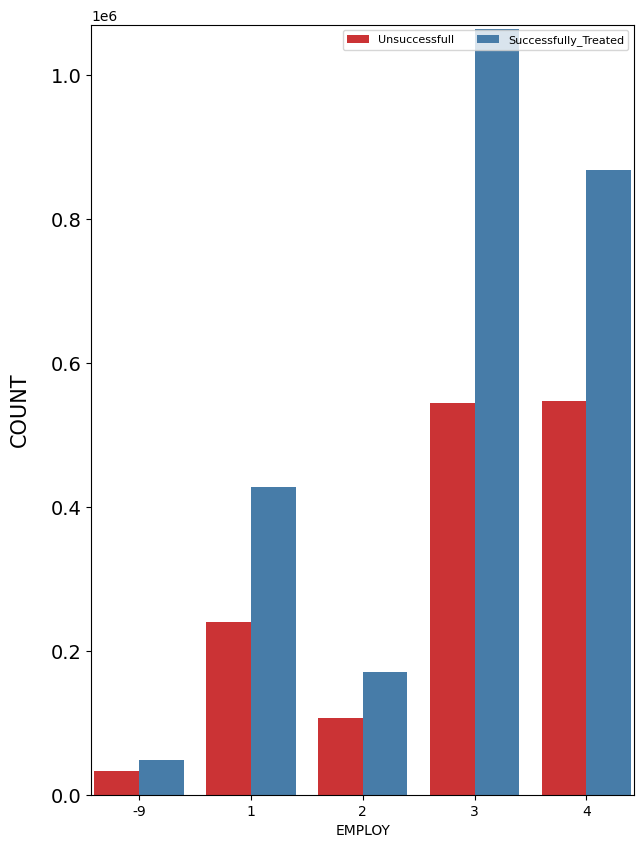

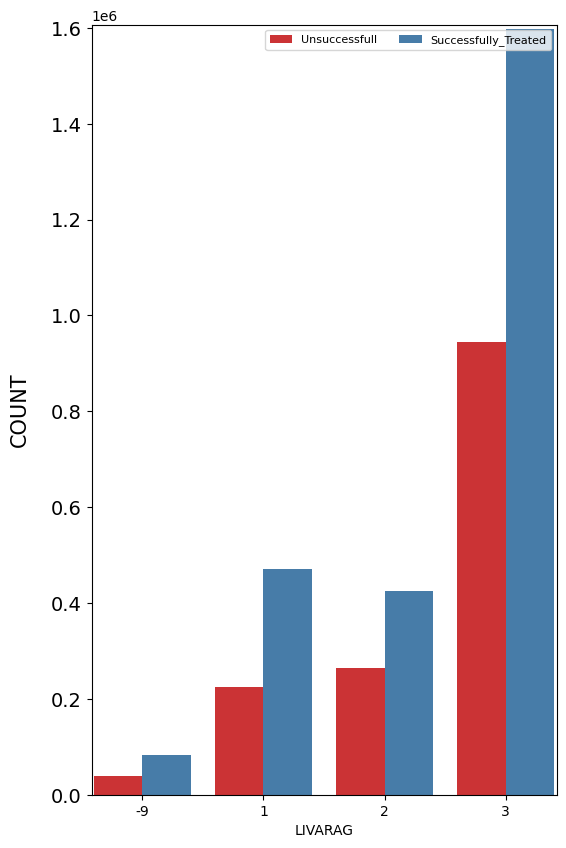

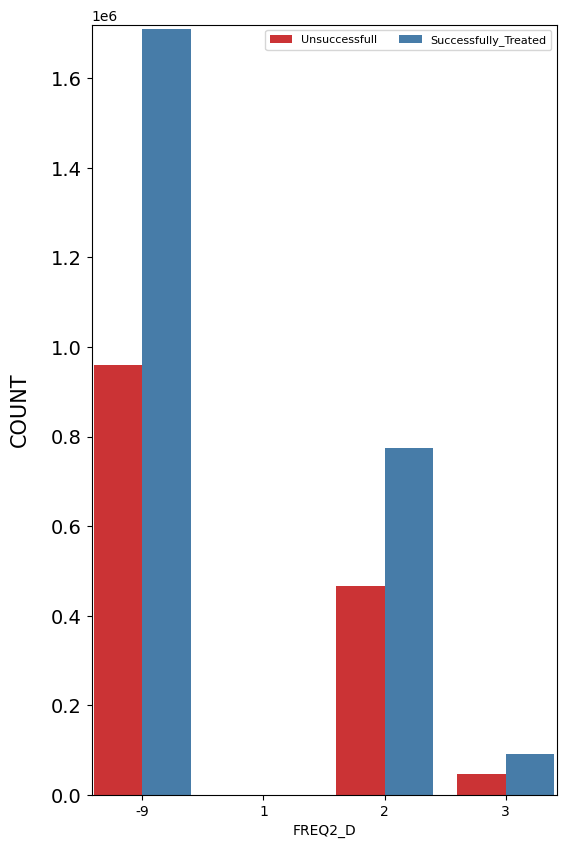

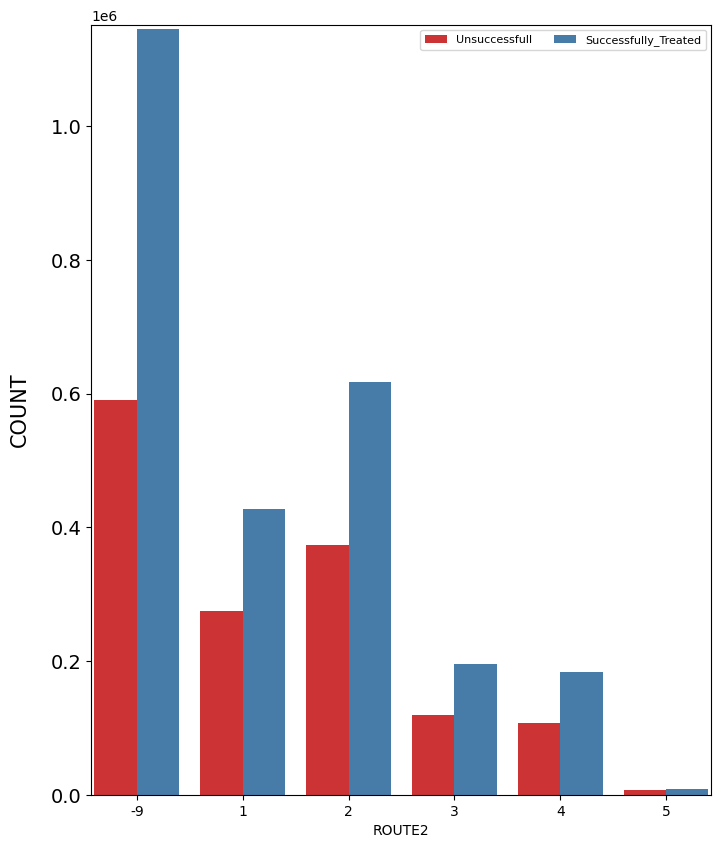

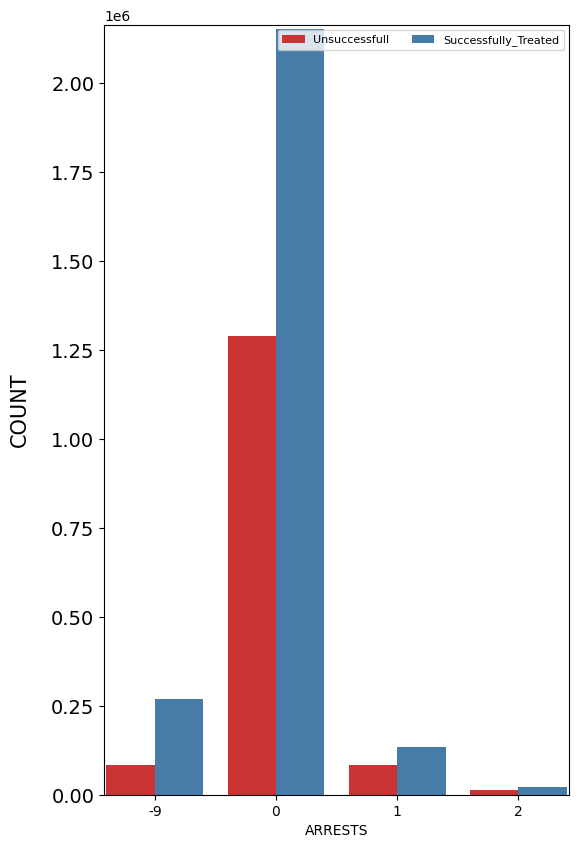

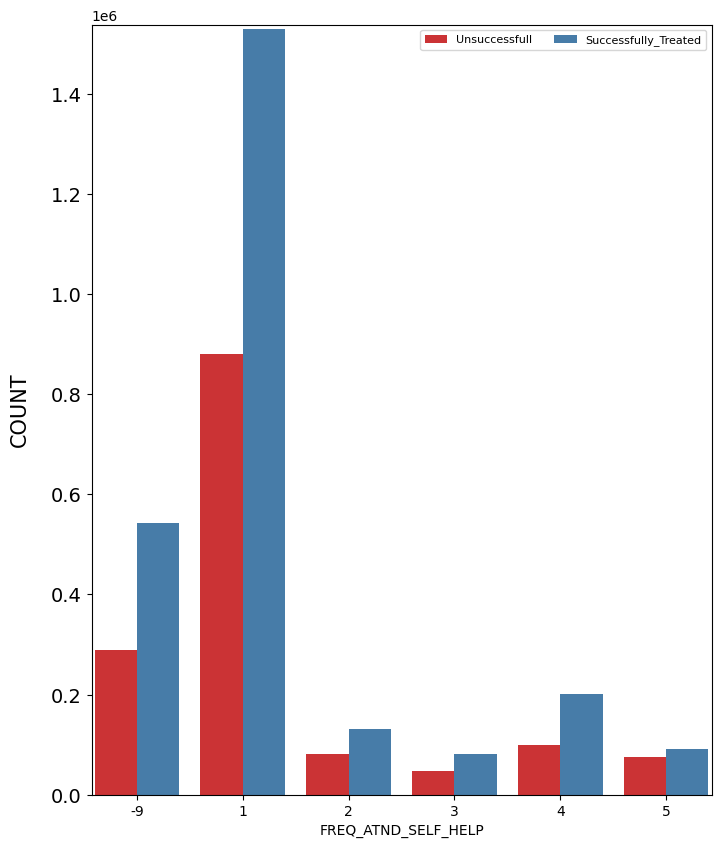

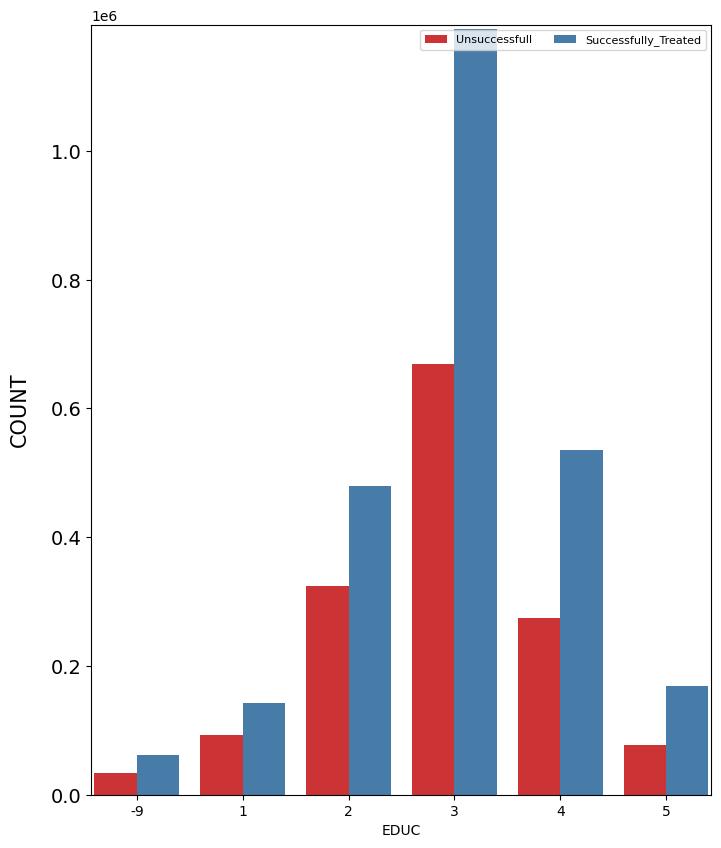

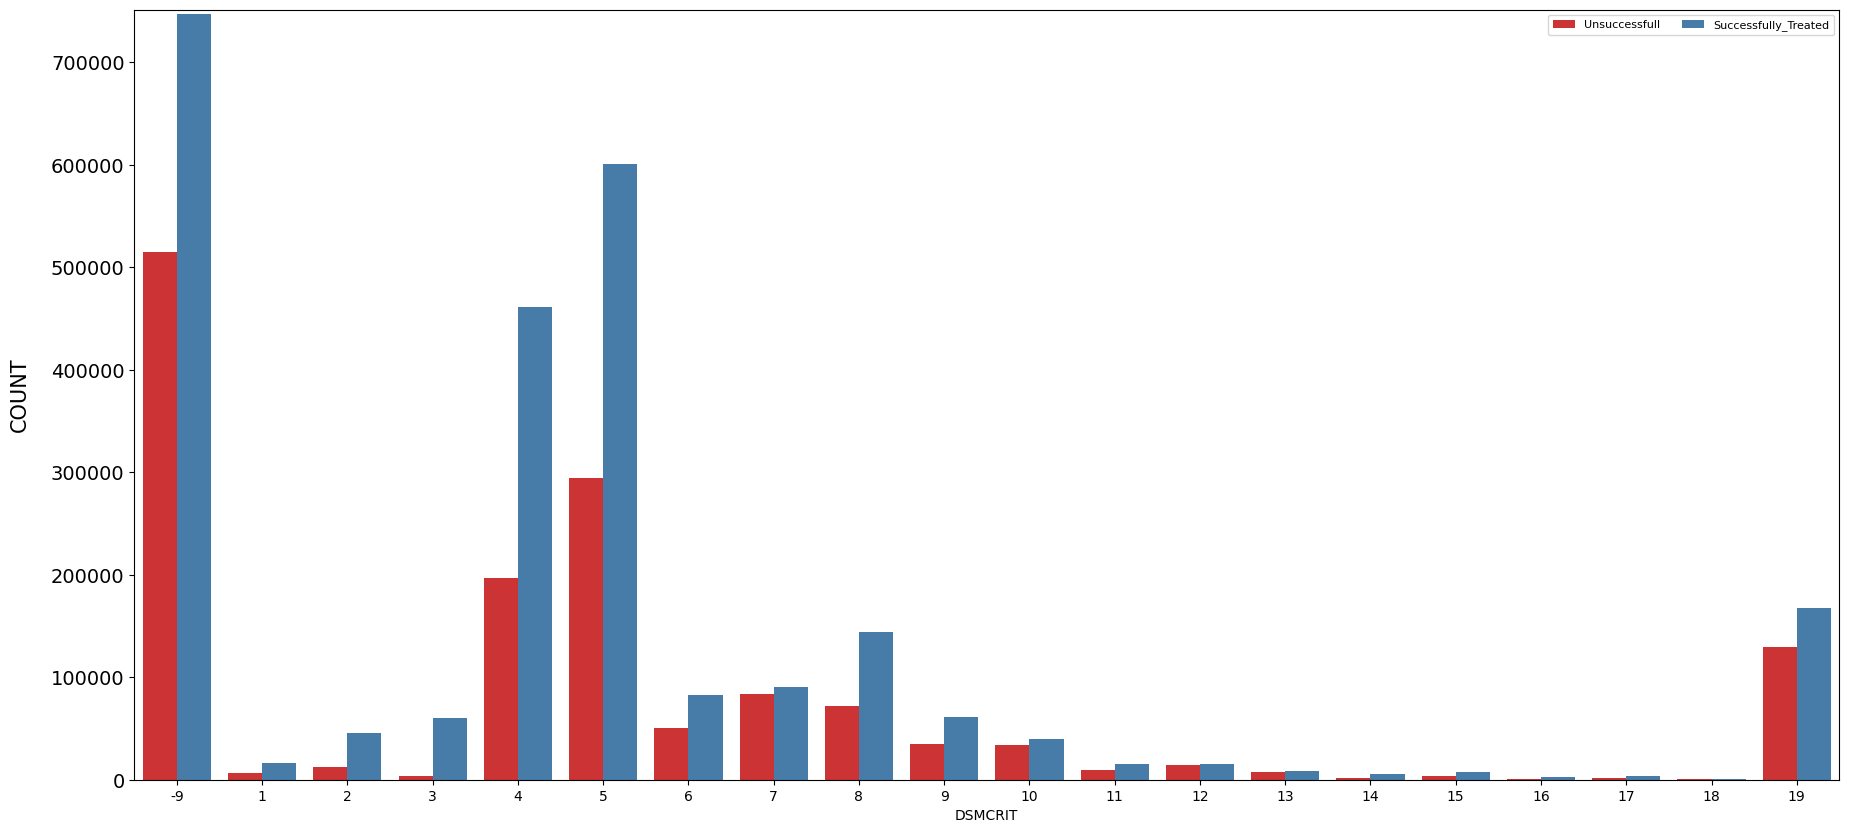

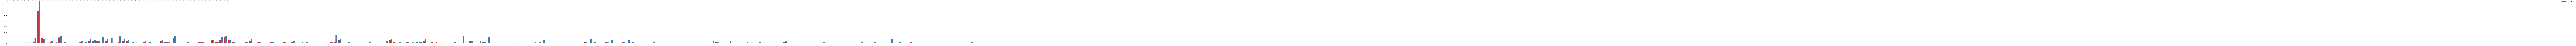

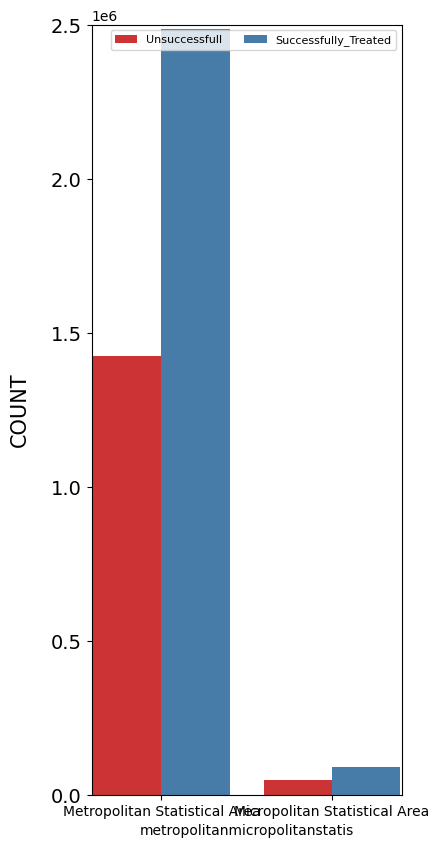

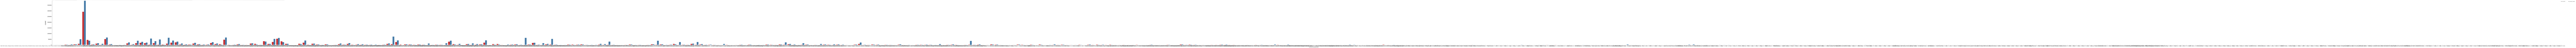

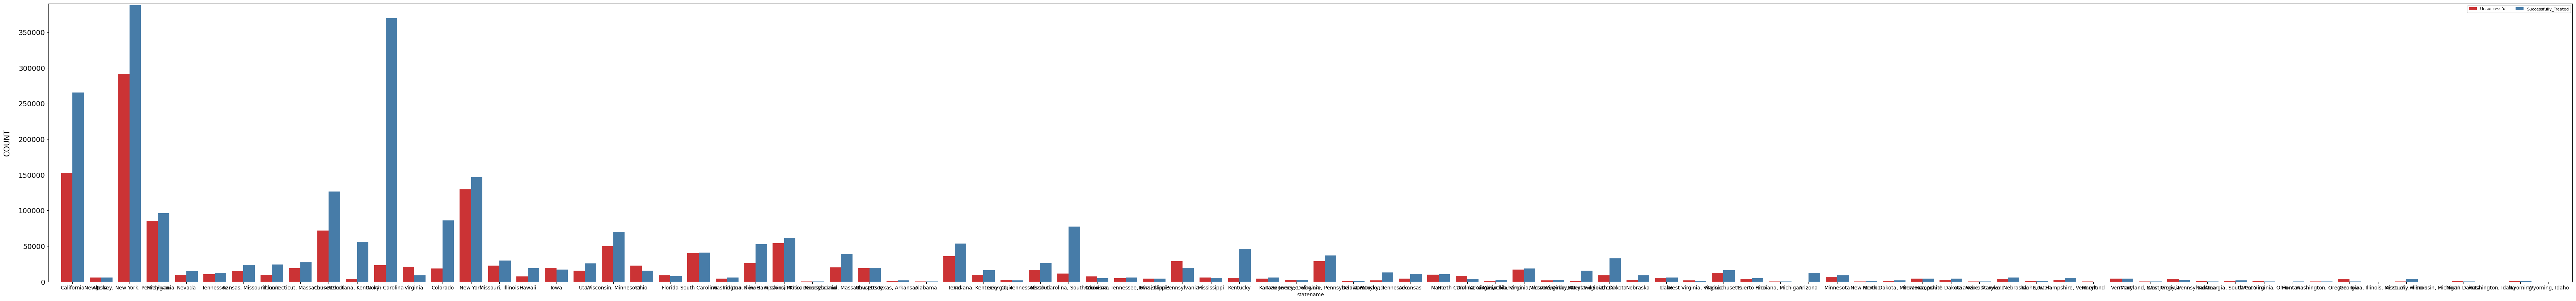

In [9]:
EDA_features=df_treatment.columns.drop(['REASON','TREATMENT_SUCCESS','fipscountycode', 'centraloutlyingcounty'])
palette=sns.color_palette("Set1")
for col in EDA_features:
    plt.figure(figsize=((len(df_treatment[col].unique())+2),10))
    
    ax=sns.countplot(x=col, hue="TREATMENT_SUCCESS", data=df_treatment, palette=palette) 

    L=ax.legend(loc='upper right', ncol=2, fontsize=8)

    L.get_texts()[1].set_text('Successfully_Treated')
    L.get_texts()[0].set_text('Unsuccessfull')

    ax.set_ylabel("COUNT", fontsize=15, labelpad=15)
    ax.tick_params(axis='y', which='major', labelsize=14)
    plt.margins(0.005)
    plt.show();

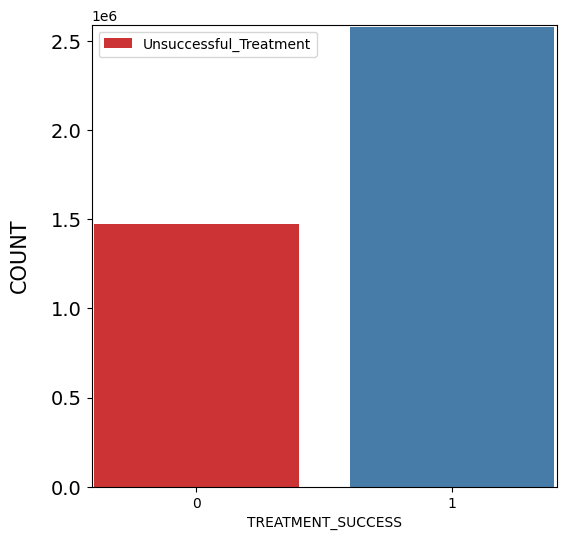

In [10]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x="TREATMENT_SUCCESS", data=df_treatment, palette=palette) 

ax.set_ylabel("COUNT", fontsize=15, labelpad=15)
ax.tick_params(axis='y', which='major', labelsize=14)

plt.legend(loc='best', labels=['Unsuccessful_Treatment','Successfuly_Treated'])
plt.margins(0.005)
plt.show();

In [11]:
# Overall Success Rate is around 64%
Success_percent=100*((df_treatment['TREATMENT_SUCCESS'].value_counts()[1])/(df_treatment['TREATMENT_SUCCESS'].value_counts()
                                                                       [1]+df_treatment['TREATMENT_SUCCESS'].value_counts()[0]))
round(Success_percent,2)

63.66

#### Lets Answer Second Question

In [12]:
df_success=df_treatment[df_treatment['TREATMENT_SUCCESS']==1]
df_unsuccess=df_treatment[df_treatment['TREATMENT_SUCCESS']==0]

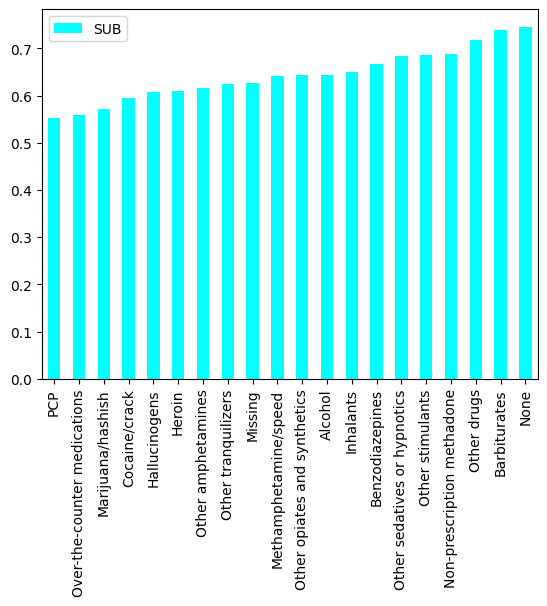

In [13]:
index=['Missing','None','Alcohol','Cocaine/crack','Marijuana/hashish','Heroin','Non-prescription methadone','Other opiates and synthetics',
       'PCP','Hallucinogens','Methamphetamine/speed','Other amphetamines','Other stimulants','Benzodiazepines','Other tranquilizers',
       'Barbiturates','Other sedatives or hypnotics','Inhalants','Over-the-counter medications','Other drugs']

df=pd.DataFrame((df_success['SUB1'].value_counts()/
                 (df_unsuccess['SUB1'].value_counts()+df_success['SUB1'].value_counts())).tolist(),index=index)


df['SUB2']=(df_success['SUB2'].value_counts()/
            (df_unsuccess['SUB2'].value_counts()+df_success['SUB2'].value_counts())).tolist()

df.rename(columns={0:"SUB1"},inplace=True)

df['SUB']=(df['SUB1']+df['SUB2'])/2

#df['Avg_Days']=df_success.groupby(['SUB1'])['LOS'].mean().tolist()

#df['Scaled_SUB']=df['SUB']/df['SUB'].max()
#df['Scaled_Avg_D']=df['Avg_Days']/df['Avg_Days'].max()

df.drop(['SUB1','SUB2'],axis=1,inplace=True)

df.sort_values(by=['SUB'],inplace=True)

df.plot.bar(color='cyan')
plt.show()

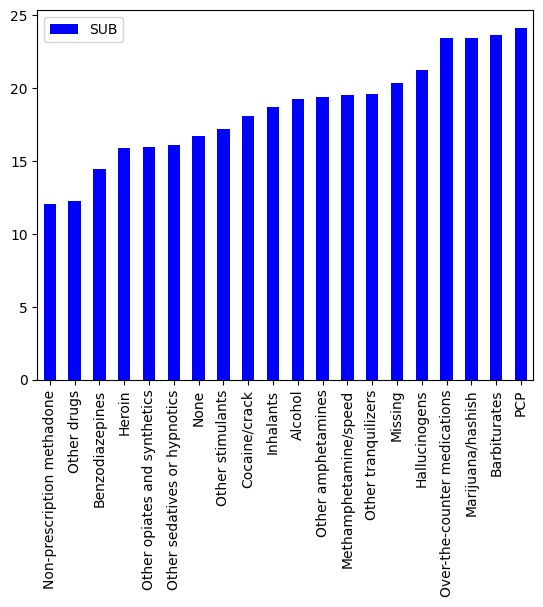

In [14]:
df_days=pd.DataFrame(df_success.groupby(['SUB1'])['LOS'].mean().tolist(),index=index)
df_days['SUB2']=(df_success.groupby(['SUB2'])['LOS'].mean().tolist())

df_days.rename(columns={0:"SUB1"},inplace=True)
df_days['SUB']=(df_days['SUB1']+df_days['SUB2'])/2

df_days.drop(['SUB1','SUB2'],axis=1,inplace=True)

df_days.sort_values(by=['SUB'],inplace=True)

df_days.plot.bar(color='blue')
plt.show()

In [15]:
mean_rate=df_treatment['TREATMENT_SUCCESS'].mean()
features=['STFIPS','REGION','DIVISION','metropolitanmicropolitanstatis']
differences=[]
for col in features:
    splits=df_success[col].value_counts()/df_treatment[col].value_counts()
    for i in (splits.values-mean_rate):
        differences.append(i)

std_dev=np.std(differences)


In [16]:
index_dict={'STFIPS':['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin'],
            'REGION':['U.S. territories','Northeast','Midwest','South','West'],
            'DIVISION':['U.S. territories','New England','Middle Atlantic','East North Central','West North Central','South Atlantic','East South Central','West South Central','Mountain','Pacific'],
            'metropolitanmicropolitanstatis':['Metropolitan Statistical Area','Micropolitan Statistical Area'],
            }

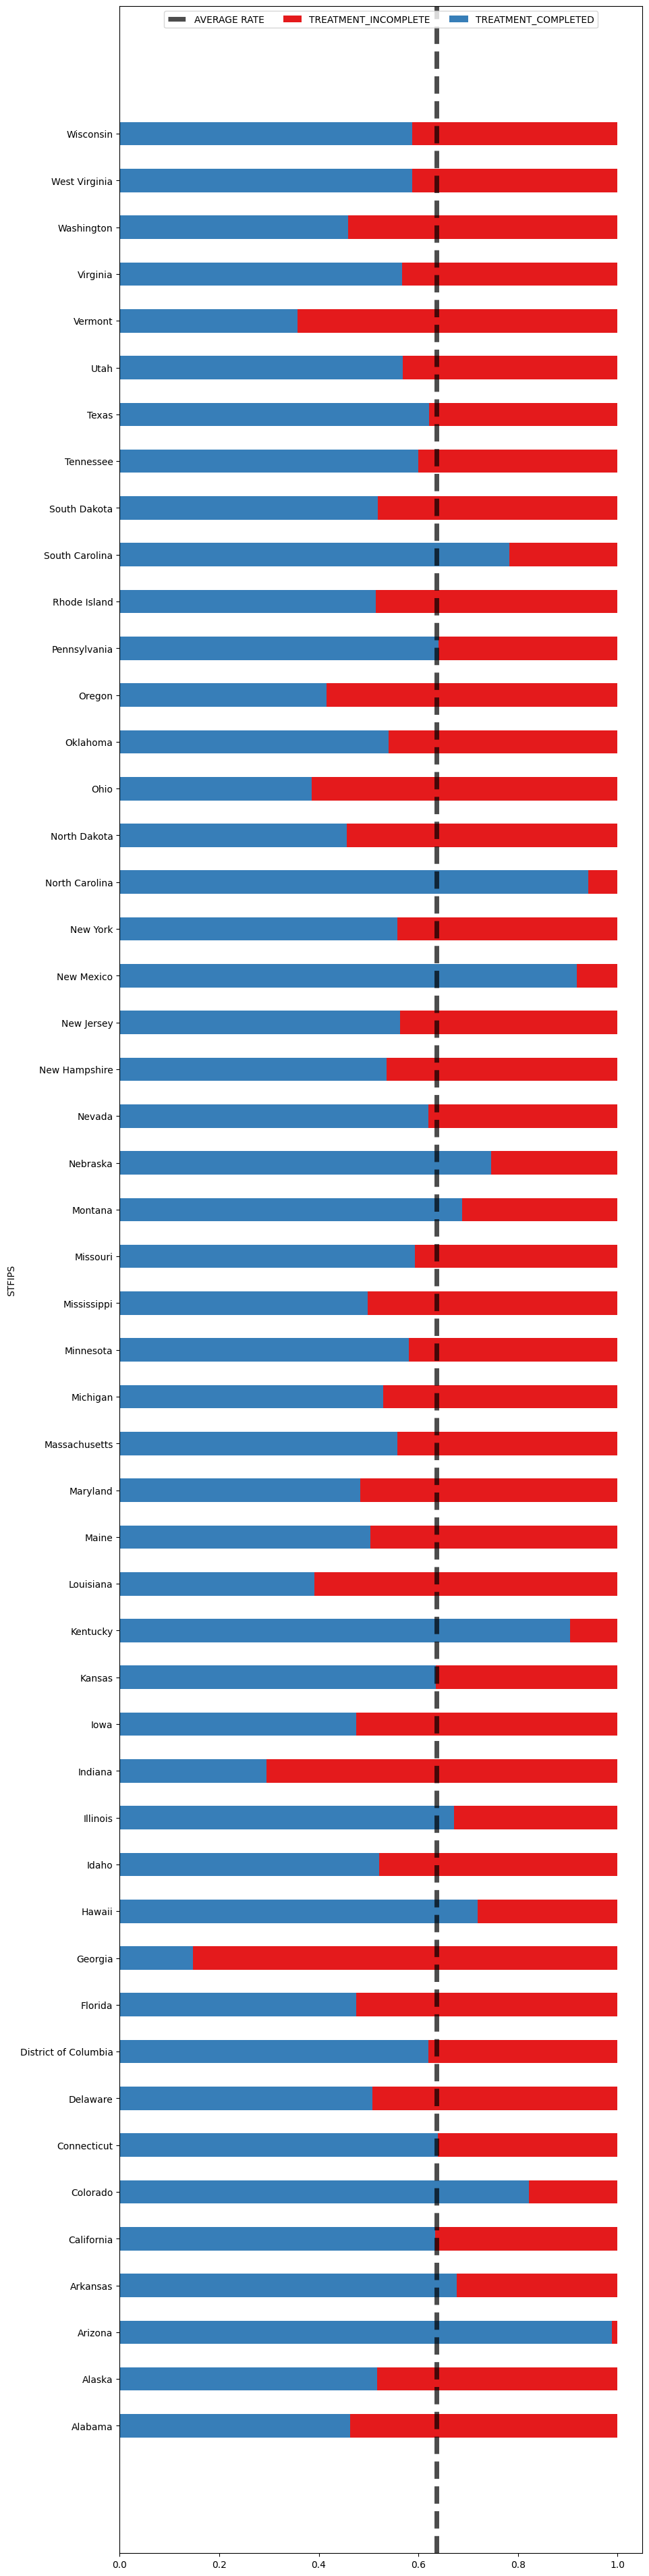

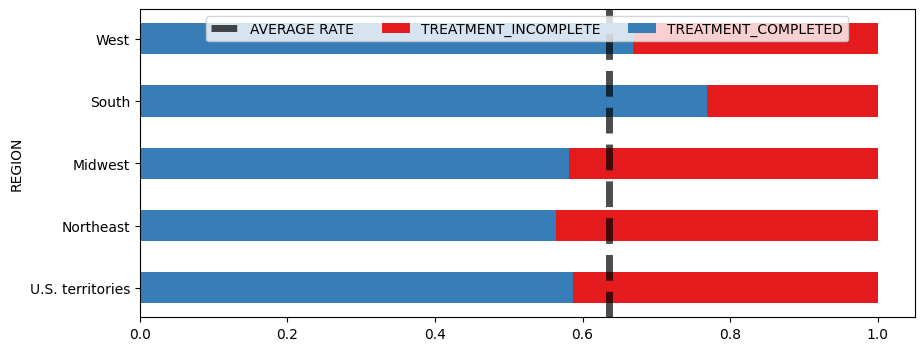

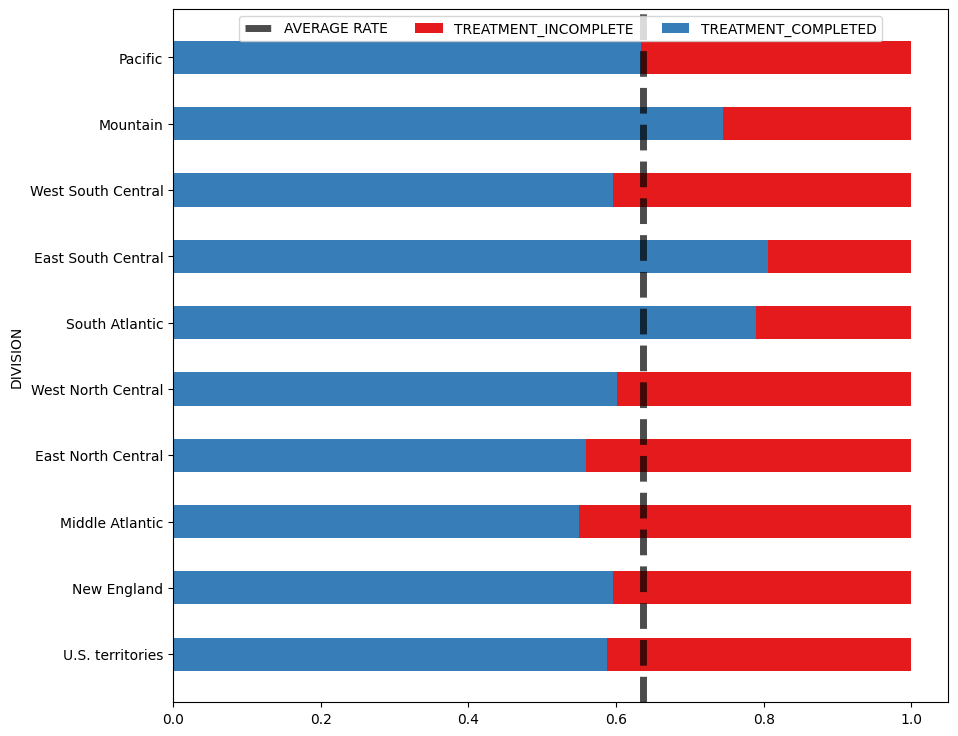

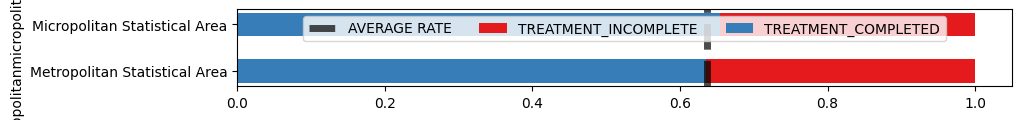

In [17]:

for col in features:
  splits=(df_success[col].value_counts()/df_treatment[col].value_counts()).sort_index()       

  
  #plot proportions of positive and negative response
  plt.figure(figsize=(10, splits.shape[0]-1))

  plt.barh(range(len(splits.index)), np.ones(len(splits.index)), 
           align='center', color=palette[0], label="TREATMENT_INCOMPLETE", height=0.5)
  plt.barh(range(len(splits.index)), splits.values, 
           align='center', color=palette[1], label="TREATMENT_COMPLETED", height=0.5)

        #plot lines for the population mean, 5th percentile, and 95th percentile
  plt.axvline(x=mean_rate, ymin=0, ymax=100, linewidth=5, alpha=0.7,
              linestyle = "--", label="AVERAGE RATE", color='k')
  
  labels=[index_dict[col][i] for i in range(len(splits))]   
  plt.legend(loc='upper center', ncol=4, fontsize=10)
  plt.yticks(range(len(splits)), labels, fontsize=10)      
        #add custom tick labels with category descriptions
  plt.ylabel(col)

  plt.show();

In [18]:
#Removing LOS from EDA features as this variable is not known at start
pred_feature=EDA_features.drop('LOS')
#pred_features

In [19]:
X = df_treatment[pred_feature]
y = df_treatment["TREATMENT_SUCCESS"]

In [20]:
list(X.columns[X.dtypes=='object'])

['cbsatitle',
 'metropolitanmicropolitanstatis',
 'countycountyequivalent',
 'statename']

In [21]:
# We can drop the above columns because the state details are present in another column "STFIPS"

In [22]:
X.drop(list(X.columns[X.dtypes=='object']),axis=1,inplace=True)

C:\Users\sthul\AppData\Local\Temp\ipykernel_3104\3862255678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(list(X.columns[X.dtypes=='object']),axis=1,inplace=True)


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049136 entries, 0 to 4049135
Data columns (total 52 columns):
 #   Column                 Dtype
---  ------                 -----
 0   FRSTUSE2               int64
 1   EMPLOY_D               int64
 2   MARSTAT                int64
 3   PRIMINC                int64
 4   NOPRIOR                int64
 5   PREG                   int64
 6   METHUSE                int64
 7   FRSTUSE3               int64
 8   DETNLF_D               int64
 9   FREQ2                  int64
 10  SUB2                   int64
 11  SUB1_D                 int64
 12  ALCDRUG                int64
 13  SERVICES               int64
 14  AGE                    int64
 15  ETHNIC                 int64
 16  SERVICES_D             int64
 17  DETNLF                 int64
 18  PRIMPAY                int64
 19  IDU                    int64
 20  REGION                 int64
 21  FREQ_ATND_SELF_HELP_D  int64
 22  FREQ3_D                int64
 23  SUB2_D                 int64
 24

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
Lr=LogisticRegression(verbose=10,n_jobs=8,random_state=101)

In [29]:
Lr.fit(X_train,y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:   37.1s
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   37.1s finished


LogisticRegression(n_jobs=8, random_state=101, verbose=10)

rf = RandomForestClassifier(n_jobs=8,verbose=10,random_state=101)
rf.fit(X_train, y_train)

In [30]:
import pickle

In [31]:
filename = 'Lr_model.sav'
pickle.dump(Lr, open(filename, 'wb'))

filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
Lr_load = pickle.load(open('Lr_model.sav', 'rb'))

In [36]:
score = Lr.score(X_test,y_test)

In [37]:
score

0.7024056980047598

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
clf = GradientBoostingClassifier(verbose=10,n_estimators=100, learning_rate=0.001, random_state=101)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           1.3103           20.65m
         2           1.3100           20.11m
         3           1.3096           20.10m
         4           1.3092           19.85m
         5           1.3089           19.57m
         6           1.3085           19.31m
         7           1.3081           19.06m
         8           1.3077           18.82m
         9           1.3074           18.60m
        10           1.3070           18.38m
        11           1.3066           18.17m
        12           1.3063           17.96m
        13           1.3059           17.78m
        14           1.3055           17.60m
        15           1.3052           17.39m
        16           1.3048           17.17m
        17           1.3045           16.96m
        18           1.3041           16.76m
        19           1.3037           16.57m
        20           1.3034           16.36m
        21           1.3030           16.15m
        2

0.6364723015029541

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read dataset
pd.set_option('display.max_columns',None)
df_TC=pd.read_csv(r"C:\Users\VP76101\Downloads\MSD_2023_Datathon_Datasets\Datasets\treatment_facilities_2016_2020.csv")
df_TC.head(5) 

C:\Users\VP76101\AppData\Local\Temp\ipykernel_35424\4040099135.py:3: DtypeWarning: Columns (6,7,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,76,77,78,80,81,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_TC=pd.read_csv(r"C:\Users\VP76101\Downloads\MSD_2023_Datathon_Datasets\Datasets\treatment_facilities_2016_2020.csv")


CASEID STATE  DETOX  TREATMT  OWNERSHP  FEDOWN HOSPITAL LOCS  ASSESSMENT  \
0       1    AK      0        1         5     NaN        0  NaN         7.0   
1       2    AK      0        1         2     NaN        0  NaN         5.0   
2       3    AK      0        1         2     NaN        0  NaN         4.0   
3       4    AK      0        1         2     NaN        0  NaN         7.0   
4       5    AK      0        1         2     NaN        0  NaN         5.0   

   TESTING  TRANSITION  ANCILLARY  OTHER_SRVC SRVC75 SRVC71 SRVC108 SRVC85  \
0      1.0         2.0       15.0         0.0      0      1       1      0   
1      3.0         1.0       14.0         0.0      0      1       1      1   
2      3.0         2.0        1.0         0.0      0      0       0      1   
3      2.0         2.0       13.0         0.0      0      0       0      0   
4      6.0         1.0       10.0         0.0      0      0       0      0   

  SRVC87 SRVC86 OTP OPIOIDMAINT OPIOIDWDRAW OPIOIDDETOX OPIOIDNAL COMPSAT  \
0      0      0   0         NaN         NaN         NaN       NaN       1   
1      1      1   0         NaN         NaN         NaN       NaN       2   
2      0      0   1           1           0           1         0       1   
3      0      0   0         NaN         NaN         NaN       NaN       1   
4      0      0   0         NaN         NaN         NaN       NaN       2   

  DUI_DWI ONLYDUI SIGNLANG LANG LANG16 LANG1 LANG2 LANG3 LANG21 LANG4 LANG5  \
0       1     0.0        0    1      0     0     0     0      0     1   1.0   
1       0     NaN        0    0    NaN   NaN   NaN   NaN    NaN   NaN   NaN   
2       0     NaN        0    0    NaN   NaN   NaN   NaN    NaN   NaN   NaN   
3       0     NaN        0    0    NaN   NaN   NaN   NaN    NaN   NaN   NaN   
4       0     NaN        0    0    NaN   NaN   NaN   NaN    NaN   NaN   NaN   

  LANG6 LANG7 LANG8 LANG24 LANG9 LANG10 LANG22 LANG25 LANG26 LANG11 LANG19  \
0     0     0     0      0     0      0      0      0      0      0      0   
1   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

  LANG23 LANG12 LANG13 LANG14 LANG15 LANG20 LANG17 LANG18 SRVC30 SRVC34  \
0      0      0      0      0      0      0      0    0.0      0      0   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      1   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      1   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      0   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      0   

  SRVC33 SRVC64 SRVC63 SRVC62 SRVC113 SRVC114 SRVC115 SRVC61 SRVC31 SRVC32  \
0      0      0      0      0       0       0       0      0      1      0   
1      0      1      0      0       0       0       0      0      1      0   
2      0      0      0      0       0       0       0      0      0      0   
3      0      0      0      0       0       0       0      0      0      0   
4      0      0      0      0       0       0       0      0      1      0   

  SRVC116  CTYPE4  CTYPEHI1  CTYPEHI2  CTYPE7  CTYPERC1  CTYPERC3  CTYPERC4  \
0       0       0       NaN       NaN       0       NaN       NaN       NaN   
1       0       0       NaN       NaN       1       0.0       1.0       1.0   
2       0       0       NaN       NaN       0       NaN       NaN       NaN   
3       0       0       NaN       NaN       1       0.0       0.0       1.0   
4       1       0       NaN       NaN       0       NaN       NaN       NaN   

   CTYPE1 CTYPE6 CTYPEML CTYPEOP  CTYPE2 CTYPE3 FEESCALE PAYASST EARMARK  \
0       1    0.0     0.0     0.0     1.0    1.0        1       0       1   
1       0    NaN     NaN     NaN     NaN    NaN        1       1       1   
2       1    0.0     1.0     

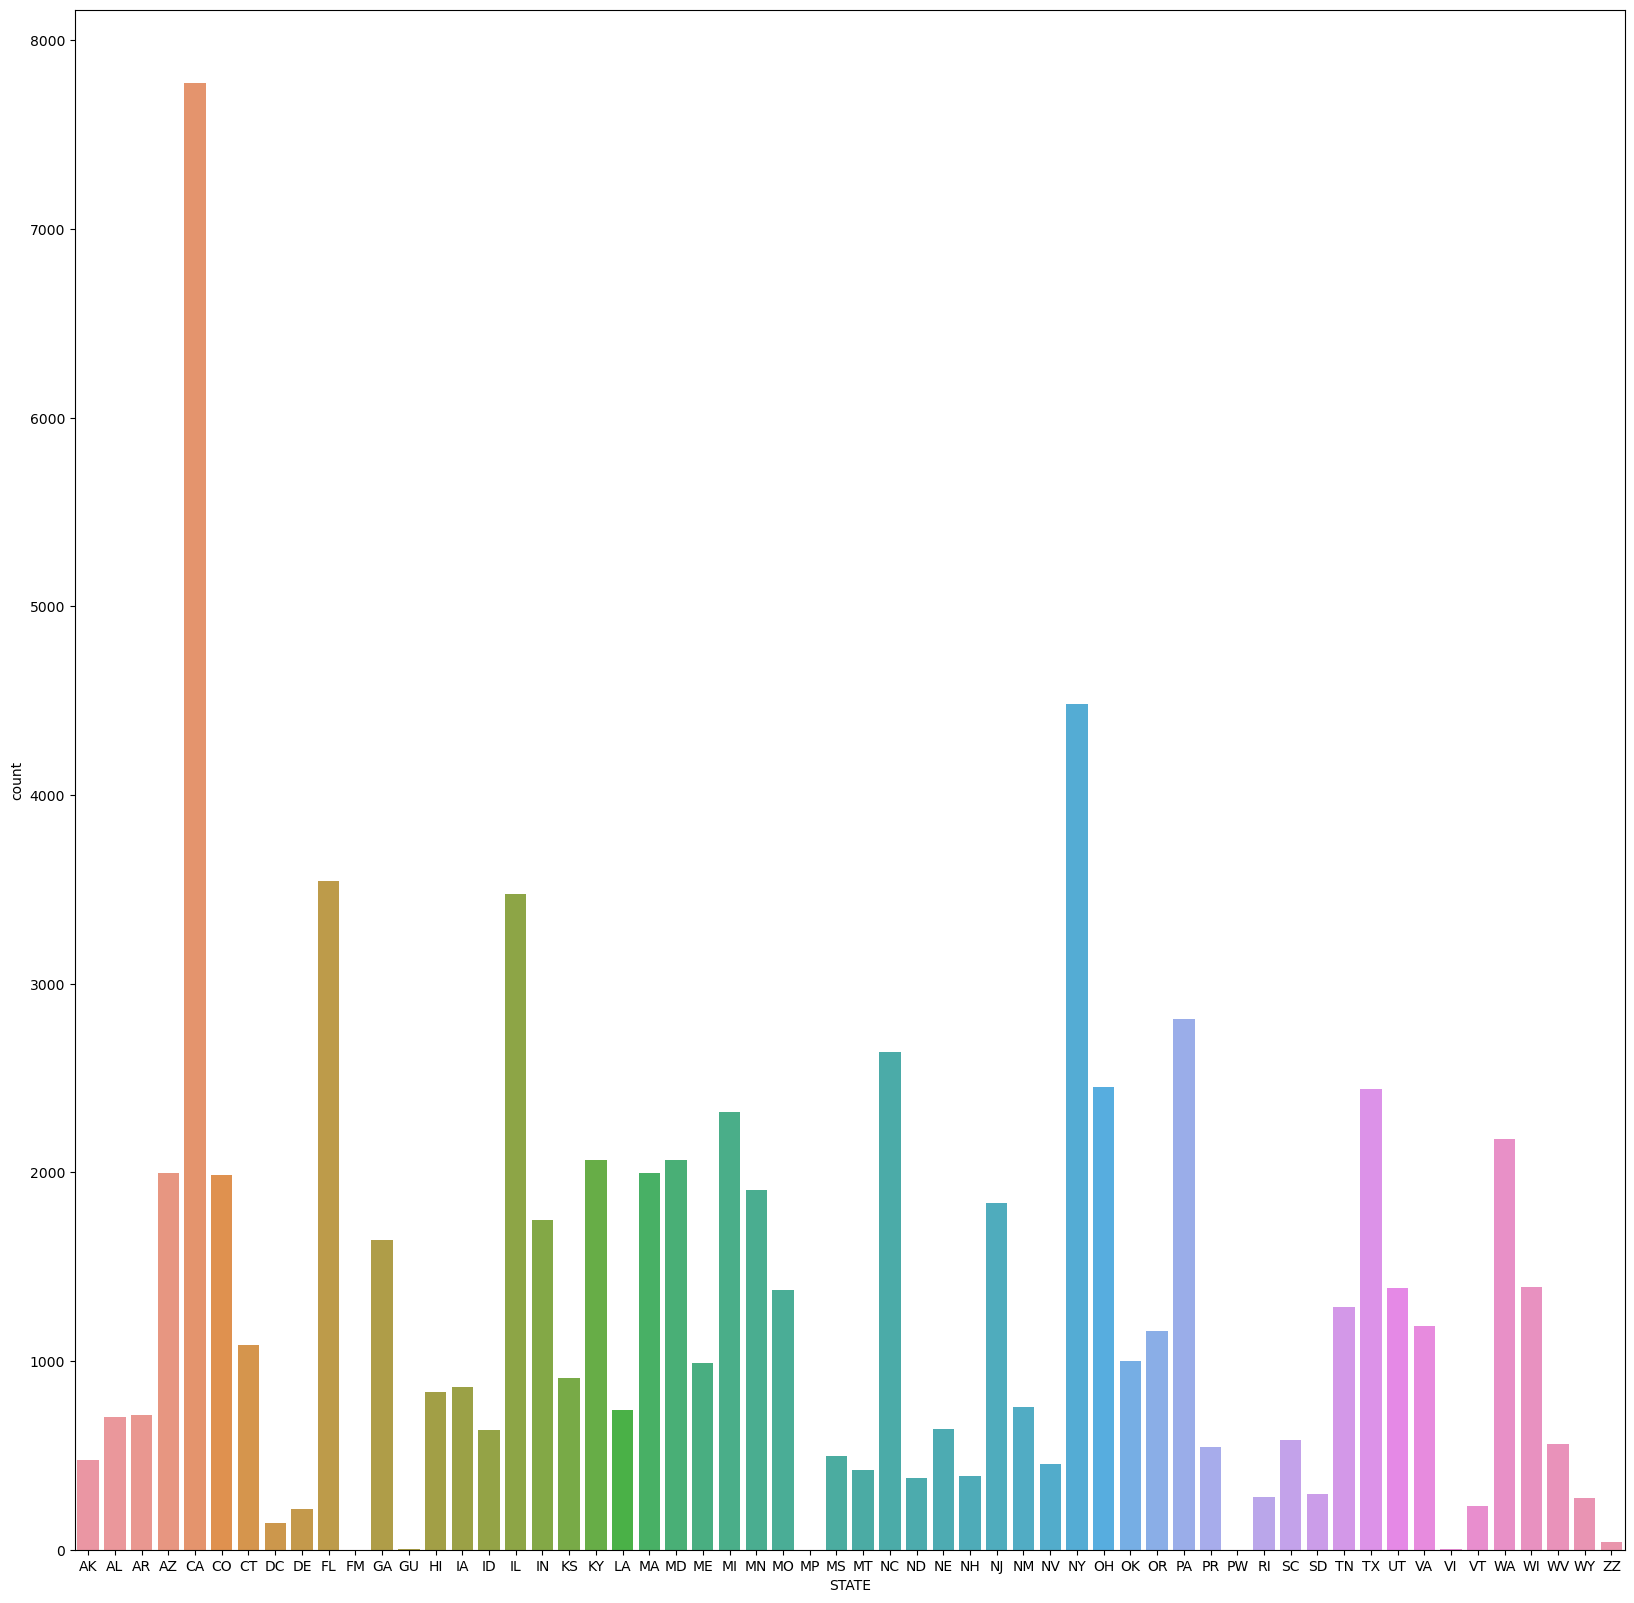

In [3]:
plt.figure(figsize=(20,20))
ax=sns.countplot(x="STATE", data=df_TC) 

In [4]:
all_values=df_TC['STATE'].value_counts()
# Read dataset
pd.set_option('display.max_columns',None)
df_pop=pd.read_csv(r"C:\Users\VP76101\Downloads\MSD_2023_Datathon_Datasets\Datasets\state_county_cbsa_population.csv")
df_pop.head(5) 

Geographic Area Name 2010_population 2011_population 2012_population  \
0              Alabama       4,785,437       4,799,069       4,815,588   
1               Alaska         713,910         722,128         730,443   
2              Arizona       6,407,172       6,472,643       6,554,978   
3             Arkansas       2,921,964       2,940,667       2,952,164   
4           California      37,319,502      37,638,369      37,948,800   

  2013_population 2014_population 2015_population 2016_population  \
0       4,830,081       4,841,799       4,852,347       4,863,525   
1         737,068         736,283         737,498         741,456   
2       6,632,764       6,730,413       6,829,676       6,941,072   
3       2,959,400       2,967,392       2,978,048       2,989,918   
4      38,260,787      38,596,972      38,918,045      39,167,117   

  2017_population 2018_population 2019_population  
0       4,874,486       4,887,681       4,903,185  
1         739,700         735,139         731,545  
2       7,044,008       7,158,024       7,278,717  
3       3,001,345       3,009,733       3,017,804  
4      39,358,497      39,461,588      39,512,223

In [5]:
# Ratio of the centres to population
data_dict={'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado','CT':'Connecticut','DE':'Delaware',
'DC':'District of Columbia','FL':'Florida','GA':'Georgia','HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa',
 'KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts','MI':'Michigan','MN':'Minnesota',
 'MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey',
 'NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma','OR':'Oregon',
 'PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
 'VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin'}

In [6]:
df=all_values.to_frame()
df.insert(0,'SNO',range(len(df)))
df.reset_index(level=0, inplace=True)
df.set_index('SNO')
df.replace({"index": data_dict},inplace=True)
df.set_index('index',inplace=True)
df_pop.set_index('Geographic Area Name',inplace=True)
new_df=df.join(df_pop)

<BarContainer object of 58 artists>

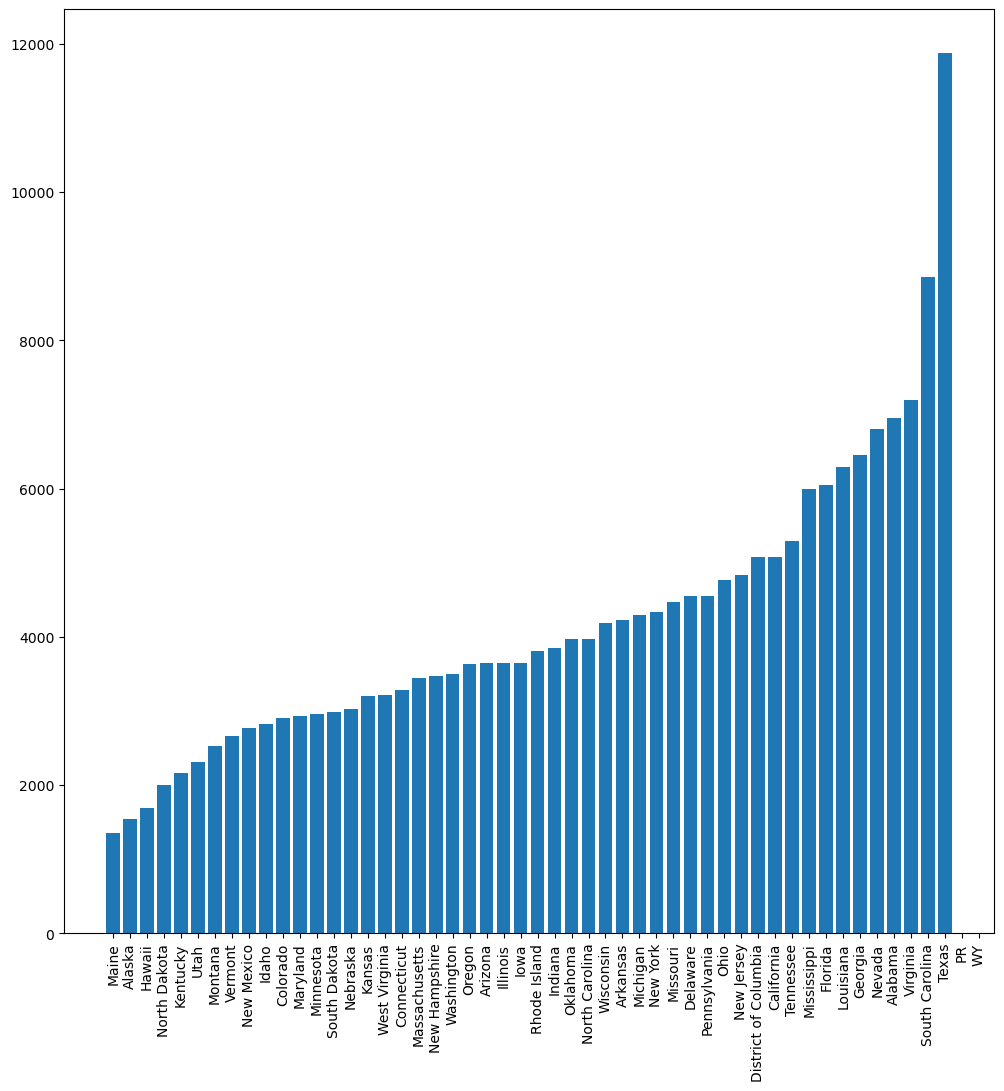

In [15]:
new_df["2019_population"] = [float(str(i).replace(",", "")) for i in new_df["2019_population"]]
new_df['RATIO']=new_df['2019_population']/new_df['STATE']
new_df.sort_values(by=['RATIO'],inplace=True)
bars_label=new_df.index
plt.figure(figsize=(12,12))
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.bar(new_df.index,new_df['RATIO'])